Part B

In [1]:
# install required library
# pip install numpy
# pip install imagehash
# pip install opencv-contrib-python

In [2]:
#import image processing library
from PIL import Image, ImageEnhance, ImageFilter

#import required library
import cv2
import numpy
import imagehash
import pandas
from IPython.display import display, HTML
from scipy.spatial import distance
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilenames
import os

In [3]:
# filepath = askopenfilenames() # show an "Open" dialog box and return the path to the selected file

# for file in filepath:
#     print(os.path.dirname(file).split('/')[-1]) #get folder name
#     print(os.path.basename(file).split('/')[-1]) #get file name
#     print(os.path.splitext(file)[1])

In [15]:
def adjust(filepath = askopenfilenames()):
    
    #record list of adjusted file name
    result = list()
    
    try:
        for file in filepath:
            
            fileName = os.path.basename(file).split('/')[-1]
            location = os.path.dirname(file)
            fileType = os.path.splitext(file)[1]
            allowedType = [".jpg",".jpeg",".png",".gif"]
            if(fileType in allowedType):
                img = cv2.imread(file)

                fileNewName = "bright1-"+fileName
                fileNewPath = location + '/' + fileNewName
                #decrease brightness by 50%
                bright_enhance1 = cv2.addWeighted(img,1,img,0,-64)
                cv2.imwrite(fileNewPath,bright_enhance1)
                result.append(fileNewPath)

                fileNewName = "bright2-"+fileName
                fileNewPath = location + '/' + fileNewName
                #increase brightness by 50%
                bright_enhance2 = cv2.addWeighted(img,1,img,0,64)
                cv2.imwrite(fileNewPath,bright_enhance2)
                result.append(fileNewPath)

                fileNewName = "constrast1-"+fileName
                fileNewPath = location + '/' + fileNewName    
                #decrease constrast by 50%
                contrast_enhance1 = cv2.addWeighted(img,0.5,img,0,0)
                cv2.imwrite(fileNewPath,contrast_enhance1)
                result.append(fileNewPath)

                fileNewName = "constrast2-"+fileName
                fileNewPath = location + '/' + fileNewName    
                #decrease constrast by 50%
                contrast_enhance2 = cv2.addWeighted(img,1.5,img,0,0)
                cv2.imwrite(fileNewPath,contrast_enhance2)
                result.append(fileNewPath)

                fileNewName = "blur-"+fileName
                fileNewPath = location + '/' + fileNewName    
                #blur the image
                blur_enhance = cv2.blur(img,(15,15))
                cv2.imwrite(fileNewPath,blur_enhance)
                result.append(fileNewPath)
            else:
                print("Non-image file detected: "+str(fileName))
                print("Please upload only image file")
            
    except Exception as e:
        print("Something went wrong: ",e)
    if(result):
        return tuple(result)
adjust()

Non-image file detected: API-ACR122U-2.04.pdf
Please upload only image file


('C:/Users/johnt/Downloads/bright1-cat.jpeg',
 'C:/Users/johnt/Downloads/bright2-cat.jpeg',
 'C:/Users/johnt/Downloads/constrast1-cat.jpeg',
 'C:/Users/johnt/Downloads/constrast2-cat.jpeg',
 'C:/Users/johnt/Downloads/blur-cat.jpeg')

In [10]:
def preprocessing(filepath = askopenfilenames()):
    
    #record list of preprocessed file name
    result = list()
    
    try:
        for file in filepath:
        
            fileName = os.path.basename(file).split('/')[-1]
            location = os.path.dirname(file)
            fileType = os.path.splitext(file)[1]
            allowedType = [".jpg",".jpeg",".png",".gif"]
            
            if(fileType in allowedType):
                
                img = cv2.imread(file)
                
                #convert into grayscale
                grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                #get the 50% of original image width
                dwidth = int(grayscale.shape[1] * 1/2)
                #get the 50% of original image height
                dheight = int(grayscale.shape[0] * 1/2)
                #save to tuple for later usage
                dsize = (dwidth,dheight)
                #scale down image
                small = cv2.resize(grayscale, dsize)
                #perform Gausian noice filters
                blur = cv2.GaussianBlur(small, (5, 5), 0)
                #rescale to standard size image
                standard = cv2.resize(blur,(400,400))

#                 cv2.imshow("Demo",standard)
#                 cv2.waitKey(0)

                fileNewName = "pro-"+fileName
                fileNewPath = location + '/' + fileNewName
                cv2.imwrite(fileNewPath,standard)
                result.append(fileNewPath)
                
            else:
                print("Non-image file detected: "+str(fileName))
                print("Please upload only image file")
                
    except Exception as e:
            print("Something went wrong: ",e)
    if(result):
        return tuple(result)
preprocessing()

('D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-blur-img1.jpeg',
 'D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-bright1-img1.jpeg',
 'D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-bright2-img1.jpeg',
 'D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-constrast1-img1.jpeg',
 'D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-constrast2-img1.jpeg',
 'D:/MMU-Stuff/Degree Year 3- Semester 3/T PS3221-Python for Security/Lab/Project Code/Images/pro-img1.jpeg')

In [6]:
def hash():
    
    #keep track number of image
    count = 1
    datas = tuple()
    datasName = tuple()
    
    try:
        filepath = askopenfilenames()
        for file in filepath:
        
            fileName = os.path.basename(file).split('/')[-1]
            location = os.path.dirname(file)
            fileType = os.path.splitext(file)[1]
            allowedType = [".jpg",".jpeg",".png",".gif"]
            
            if(fileType in allowedType):
                
                data = list()
                img = Image.open(file)

                #average hash
                ahash = imagehash.average_hash(img)
                #difference hash
                dhash = imagehash.dhash(img)
                #perceptual hash
                phash = imagehash.phash(img)
                #wavelet hash
                whash = imagehash.whash(img)                     

                count = count + 1

                #store all hash value of an image into a same list
                data.append([str(ahash),str(dhash),str(phash),str(whash)])
                #store the data into a larger group to be displayed later in pandas dataframe
                datas = datas + tuple(data)
                #store the name of file
                datasName = datasName + (fileName,)
            
            else:
                print("Non-image file detected: "+str(fileName))
                print("Please upload only image file")
                
    except Exception as e:
        print("Something went wrong: ",e)
            
    result = dict()
    for j in range(1,count):
        #getting name of file
        Cname = datasName[j-1]
        #getting value of dictionary under each key
        result[Cname] = datas[j-1]
        
    #creating a pandas dataframe
    df = pandas.DataFrame(result,index=["Average Hash","Difference Hash","Perceptual Hash","Wavelet Hash"])
    #display in table format
    display(df)
hash()     

,pro-blur-img1.jpeg,pro-bright1-img1.jpeg,pro-bright2-img1.jpeg,pro-constrast1-img1.jpeg,pro-constrast2-img1.jpeg,pro-img1.jpeg
Average Hash,cfc7a7270f2d65c7,cfc7af260f2c64c3,cfc7a7272f2d65c7,cfc7a7272f2d65c7,cfc7a7272f2d65c7,cfc7af272f2d6dc7
Difference Hash,9e9e5f6e5849c99f,9e8e5b6e58c9c99f,9e9e5f6e5849cd9f,9e9e5f6e5849c99f,9e9e5f6e4849cd9f,9e9e5f6e5849cd9f
Perceptual Hash,b3bce0809dce8bd8,b3bce080bcce8bd8,b3bce0809dce8bd8,b3bce0809dce8bd8,b3b4e0829dce8bd8,b3bce0809dce8bd8
Wavelet Hash,cfc3a7260f2c64c3,cfc3afa60c2c64c3,cfc3a7a60e2c64c3,cfc3a7a60e2c64c3,cfc3a7a60e2c64c3,cfc3a7a60e2c64c3


In [11]:
def similarity(cFile, hashType, filepath = askopenfilenames()):
    
    try:
        result = dict()
        #alert user if number of file is too less
        if(len(filepath) <= 0):
            print("Number of file must be at least 2 to be comparable")
        else:
            for i,name in enumerate(filepath):

                CfileName = cFile
                fileName = os.path.basename(filepath[i]).split('/')[-1]
                location = os.path.dirname(filepath[i])
                fileType = os.path.splitext(filepath[i])[1]
                allowedType = [".jpg",".jpeg",".png",".gif"]

                if(fileType in allowedType):

                    img1 = cv2.imread(location + '/' + cFile)
                    img2 = cv2.imread(filepath[i])

                    #get hash value for img1 and img2
                    match hashType:
                        case "average":
                            h_img1 = imagehash.average_hash(Image.fromarray(img1))
                            h_img2 = imagehash.average_hash(Image.fromarray(img2))
                        case "difference":
                            h_img1 = imagehash.dhash(Image.fromarray(img1))
                            h_img2 = imagehash.dhash(Image.fromarray(img2))
                        case "perceptual":
                            h_img1 = imagehash.phash(Image.fromarray(img1))
                            h_img2 = imagehash.phash(Image.fromarray(img2))
                        case "wavelet":
                            h_img1 = imagehash.whash(Image.fromarray(img1))
                            h_img2 = imagehash.whash(Image.fromarray(img2))
                        case _:
                            print("Please insert a proper hashing type")


                    #convert hex based hash value to binary
                    b_img1 = str(bin(int(str(h_img1),16)))[2:]
                    #convert hex based hash value to binary
                    b_img2 = str(bin(int(str(h_img2),16)))[2:]

                    #to make two variable have equal length by padding zero to variable with shorter length
                    if len(b_img1) < len(b_img2):
                        b_img1 = b_img1.zfill(len(b_img2))
                    else:
                        b_img2 = b_img2.zfill(len(b_img1))

                    #convert hash value into 1-D array
                    flat_1 = numpy.array(list(b_img1))
                    flat_2 = numpy.array(list(b_img2))

                    #getting hamming distance value
                    ham_dist = distance.hamming(flat_1, flat_2)
                    similarity = (1-ham_dist)*100

                    #store result into dictionary
                    key = CfileName+" & "+fileName
                    result[key] = round(similarity,2)

    except Exception as e:
        print("Something went wrong: ",e) 
        
    if(result):
        return result

similarity("pro-img1.jpeg","average")

{'pro-img1.jpeg & pro-blur-img1.jpeg': 95.31,
 'pro-img1.jpeg & pro-bright1-img1.jpeg': 90.62,
 'pro-img1.jpeg & pro-bright2-img1.jpeg': 96.88,
 'pro-img1.jpeg & pro-constrast1-img1.jpeg': 96.88,
 'pro-img1.jpeg & pro-constrast2-img1.jpeg': 96.88}

Part C

Comparison of similarity index starting with Images 1 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img1.jpeg & pro-img2.jpg,43.75,42.19,53.12,43.75
pro-img1.jpeg & pro-img3.jpg,43.75,53.12,50.00,56.25
pro-img1.jpeg & pro-img4.jpeg,62.50,48.44,59.38,59.38
pro-img1.jpeg & pro-img5.jpg,50.00,46.88,40.62,50.00
pro-img1.jpeg & pro-img6.jpeg,50.00,46.88,40.62,46.88
pro-img1.jpeg & pro-img7.jpg,40.62,45.31,46.88,40.62
pro-img1.jpeg & pro-img8.jpg,57.81,46.88,50.00,53.12
pro-img1.jpeg & pro-img9.jpeg,53.12,59.38,53.12,59.38
pro-img1.jpeg & pro-img10.jpeg,51.56,45.31,46.88,46.88


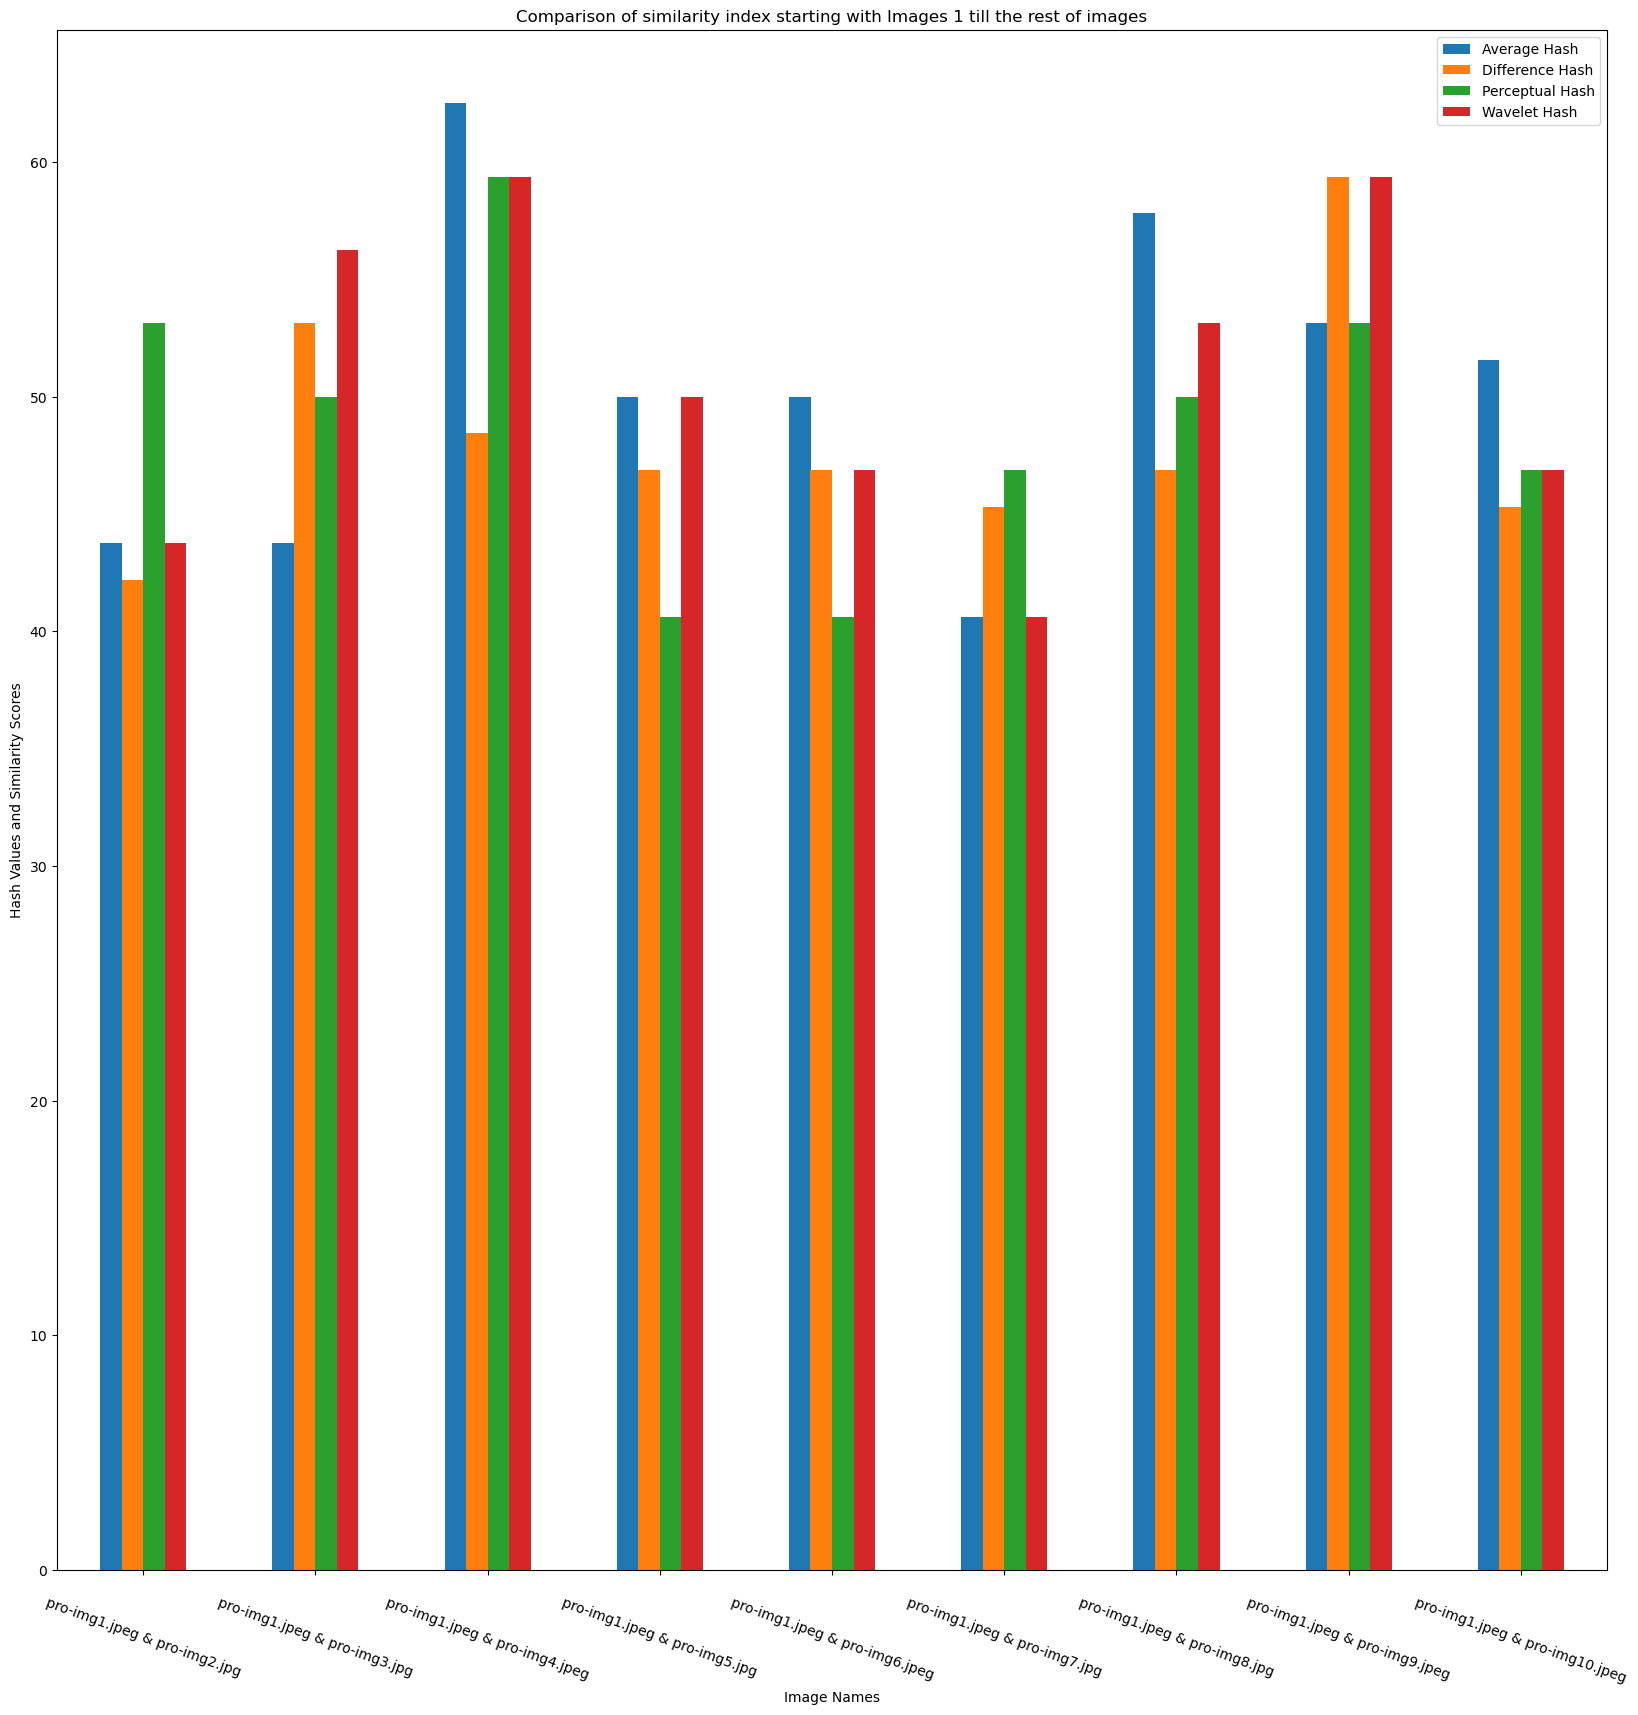

Comparison of similarity index starting with Images 2 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img2.jpg & pro-img3.jpg,39.68,45.31,43.75,37.50
pro-img2.jpg & pro-img4.jpeg,25.81,42.86,53.12,31.15
pro-img2.jpg & pro-img5.jpg,58.06,57.14,56.25,55.93
pro-img2.jpg & pro-img6.jpeg,52.38,54.69,50.00,56.67
pro-img2.jpg & pro-img7.jpg,56.25,46.88,50.00,53.12
pro-img2.jpg & pro-img8.jpg,35.94,51.56,40.62,31.25
pro-img2.jpg & pro-img9.jpeg,25.00,41.27,34.38,28.12
pro-img2.jpg & pro-img10.jpeg,39.06,42.86,40.62,37.50


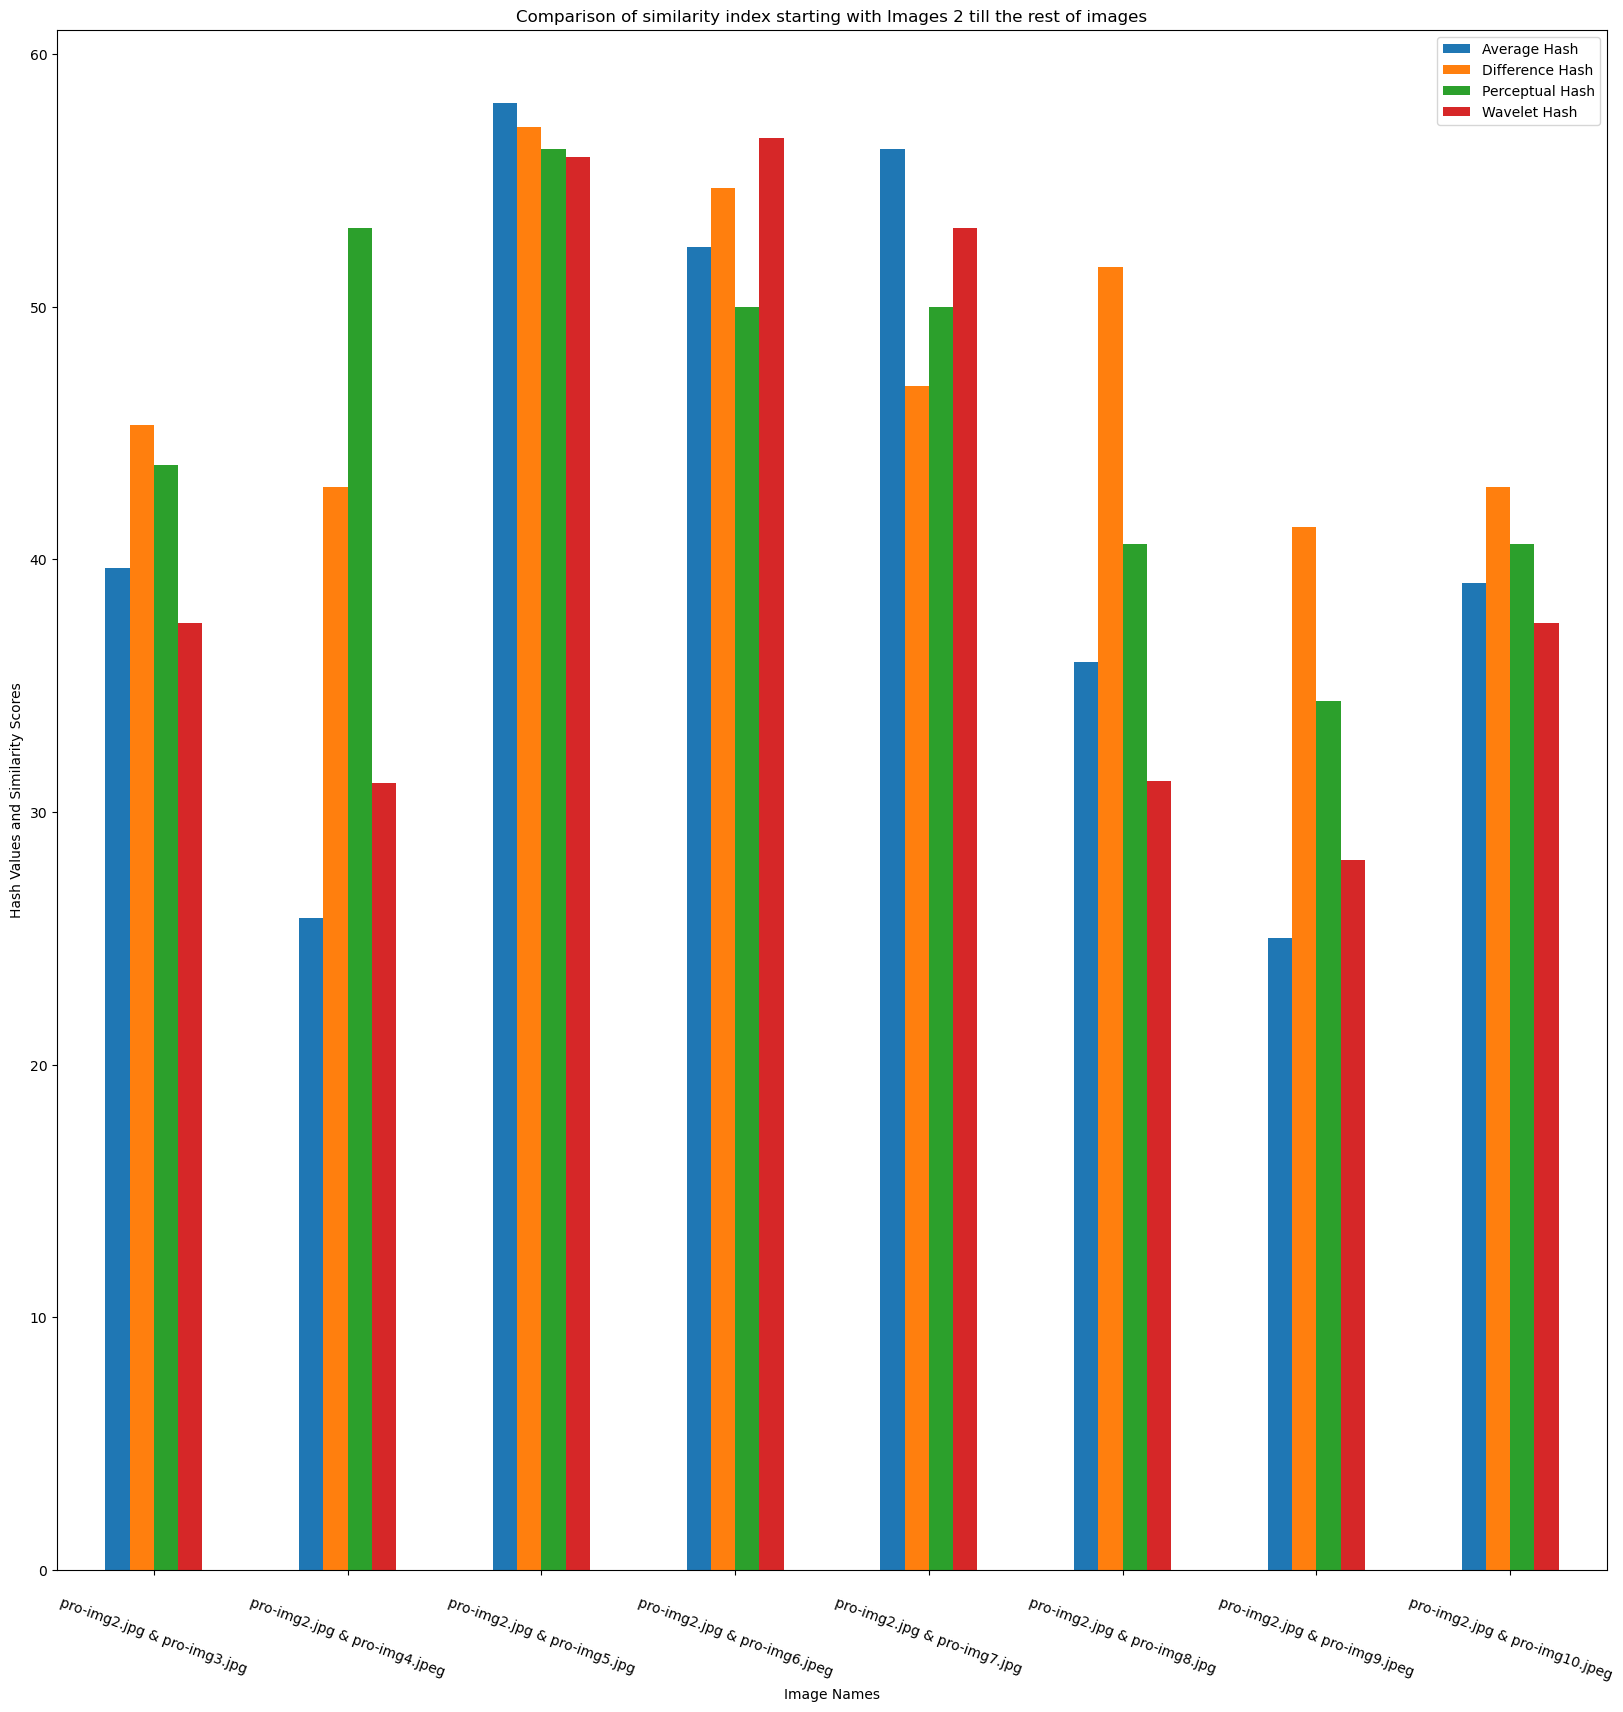

Comparison of similarity index starting with Images 3 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img3.jpg & pro-img4.jpeg,49.21,51.56,50.00,50.00
pro-img3.jpg & pro-img5.jpg,68.25,62.50,59.38,62.50
pro-img3.jpg & pro-img6.jpeg,39.68,50.00,53.12,37.50
pro-img3.jpg & pro-img7.jpg,37.50,54.69,46.88,34.38
pro-img3.jpg & pro-img8.jpg,42.19,50.00,37.50,46.88
pro-img3.jpg & pro-img9.jpeg,59.38,53.12,59.38,53.12
pro-img3.jpg & pro-img10.jpeg,35.94,45.31,53.12,43.75


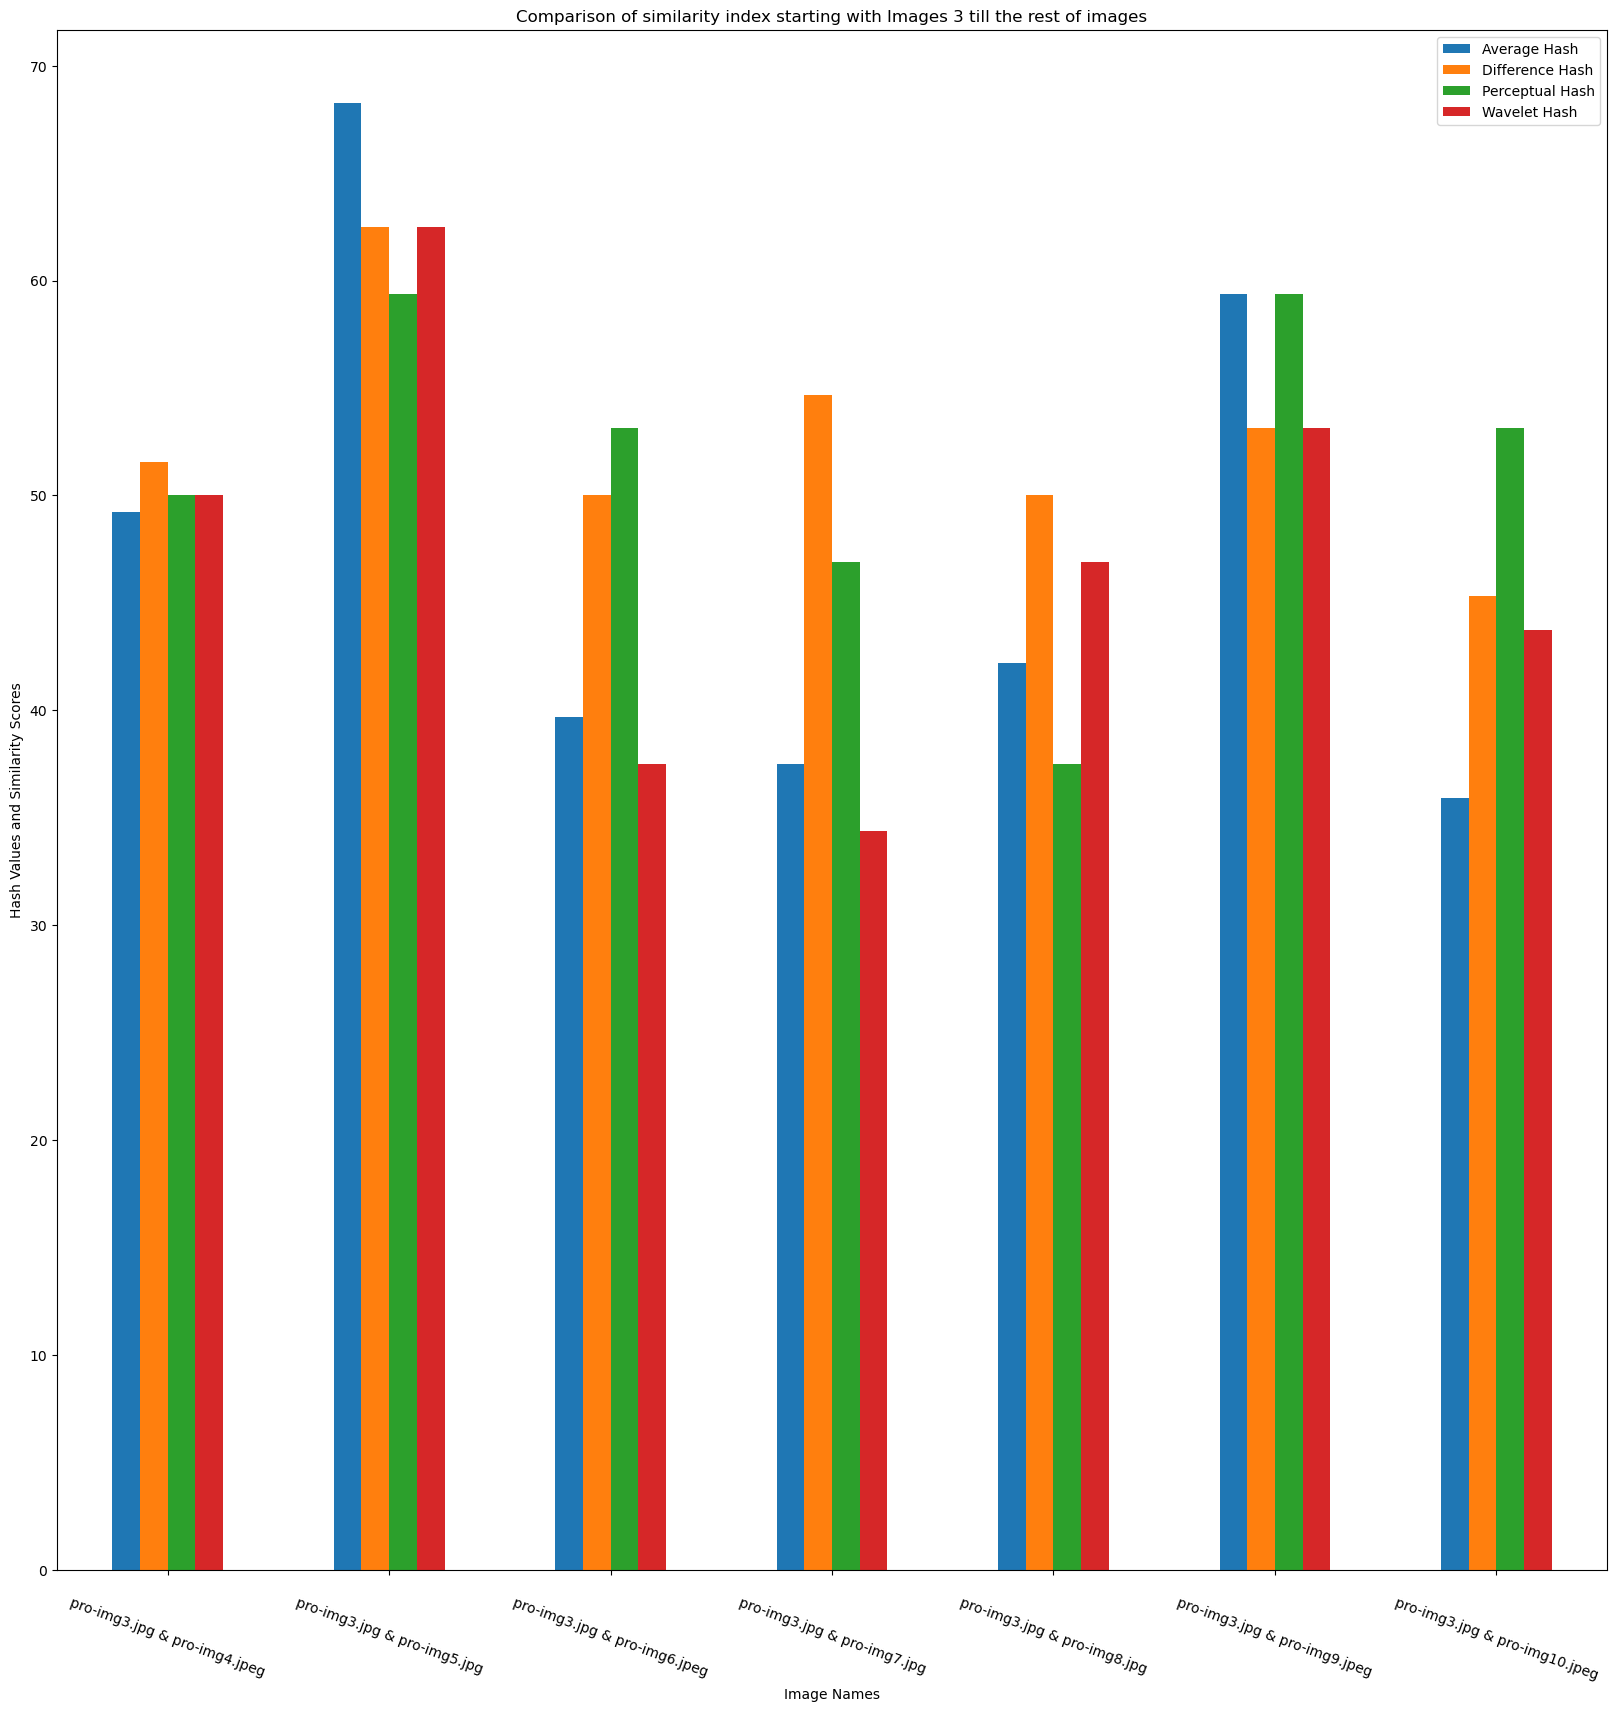

Comparison of similarity index starting with Images 4 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img4.jpeg & pro-img5.jpg,46.67,41.27,53.12,50.82
pro-img4.jpeg & pro-img6.jpeg,42.86,54.69,46.88,47.54
pro-img4.jpeg & pro-img7.jpg,40.62,50.00,50.00,43.75
pro-img4.jpeg & pro-img8.jpg,67.19,45.31,53.12,62.50
pro-img4.jpeg & pro-img9.jpeg,71.88,59.68,43.75,65.62
pro-img4.jpeg & pro-img10.jpeg,67.19,52.38,50.00,65.62


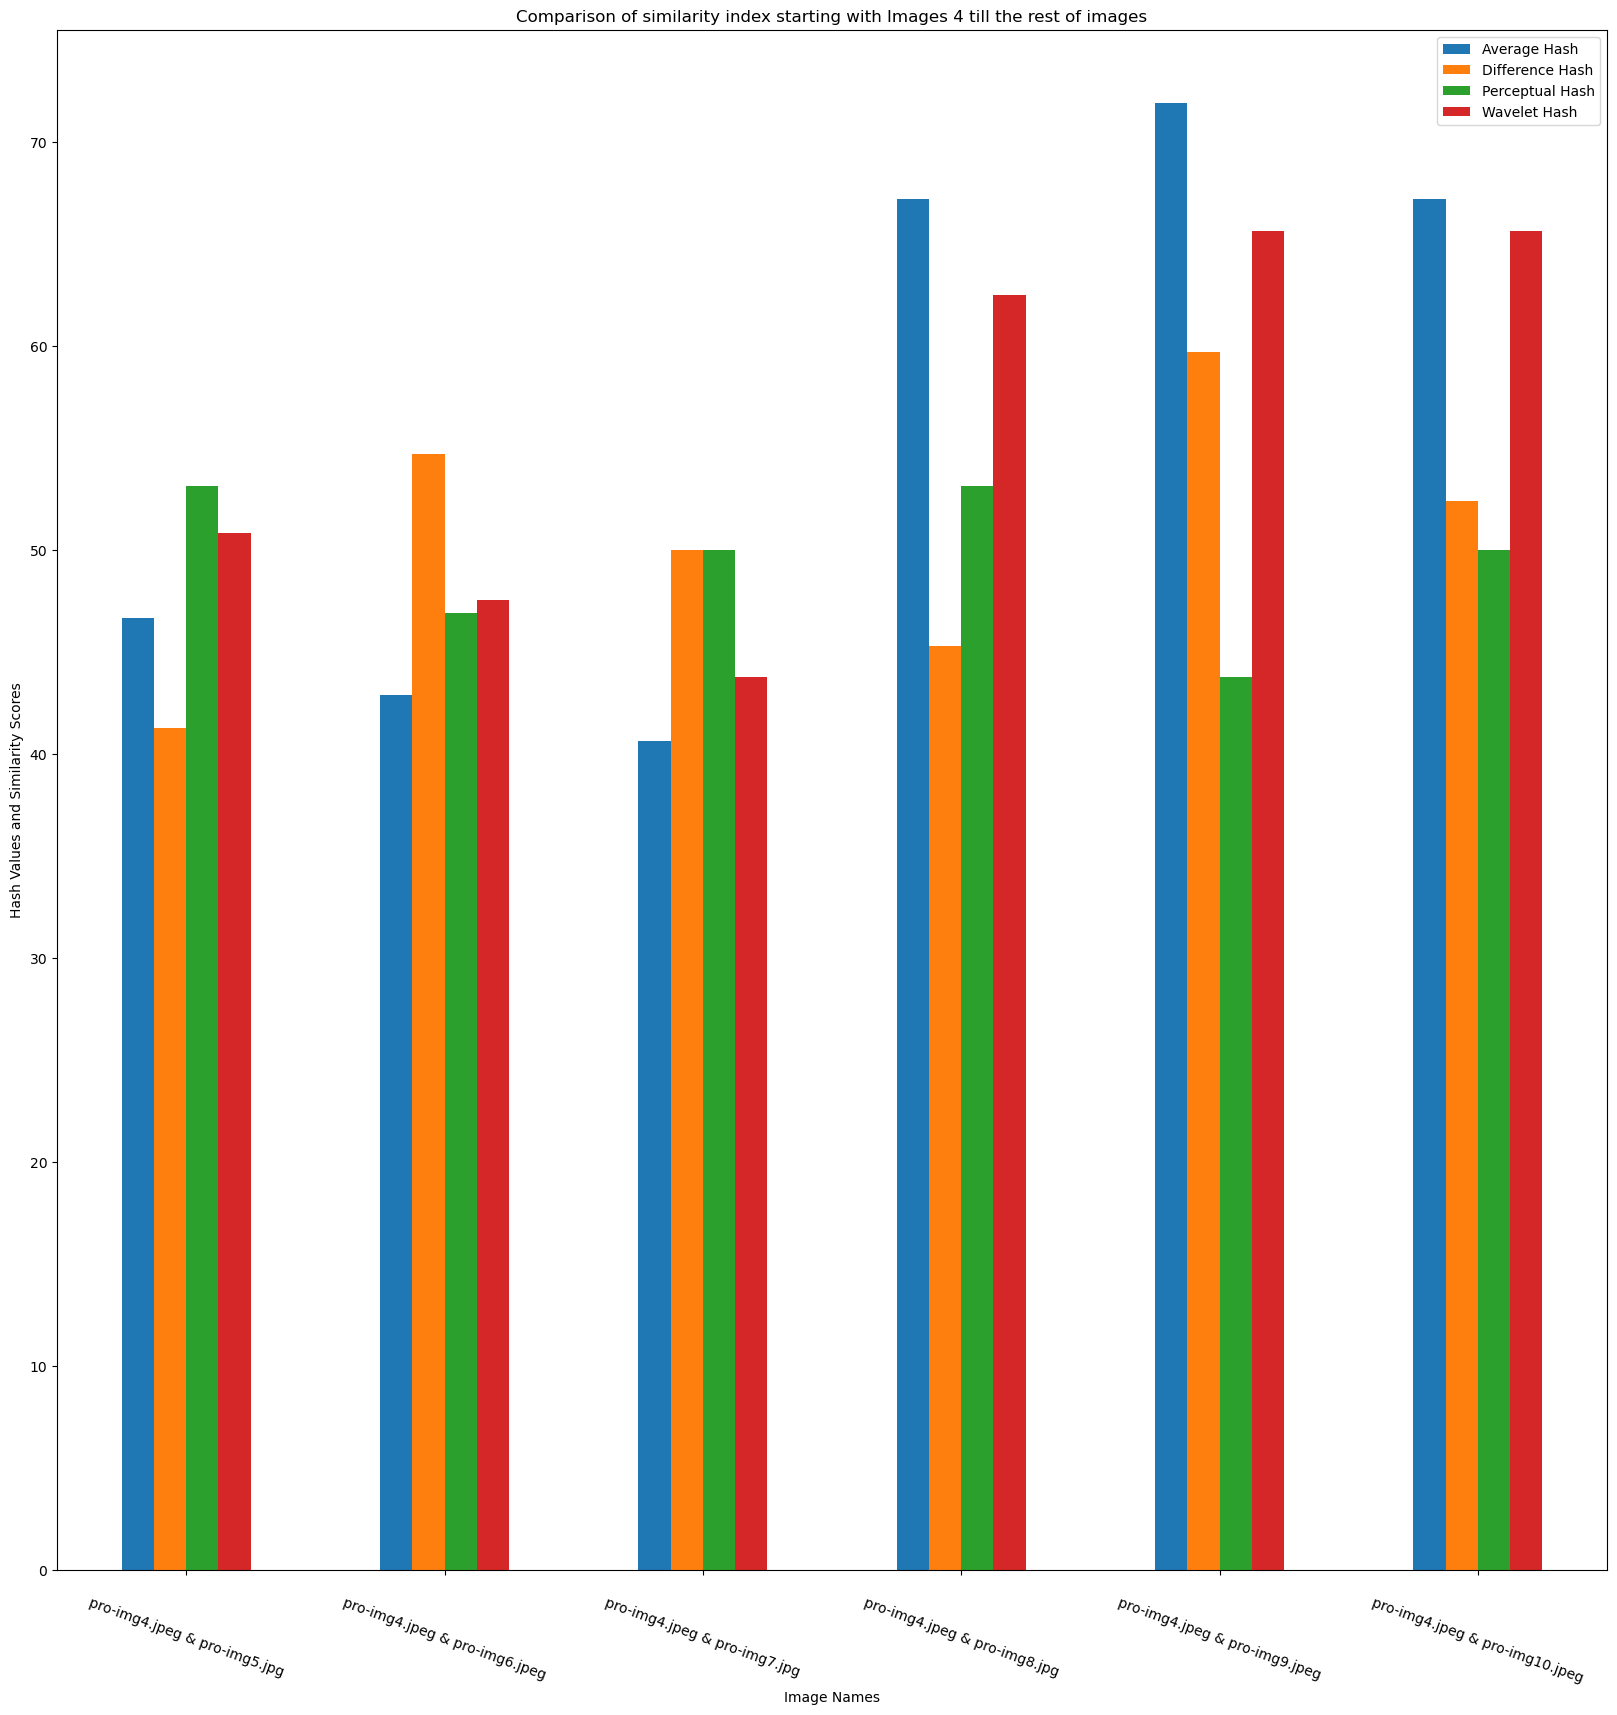

Comparison of similarity index starting with Images 5 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img5.jpg & pro-img6.jpeg,39.68,53.12,50.00,36.67
pro-img5.jpg & pro-img7.jpg,37.50,51.56,43.75,43.75
pro-img5.jpg & pro-img8.jpg,39.06,50.00,53.12,40.62
pro-img5.jpg & pro-img9.jpeg,43.75,42.86,50.00,34.38
pro-img5.jpg & pro-img10.jpeg,35.94,50.79,56.25,43.75


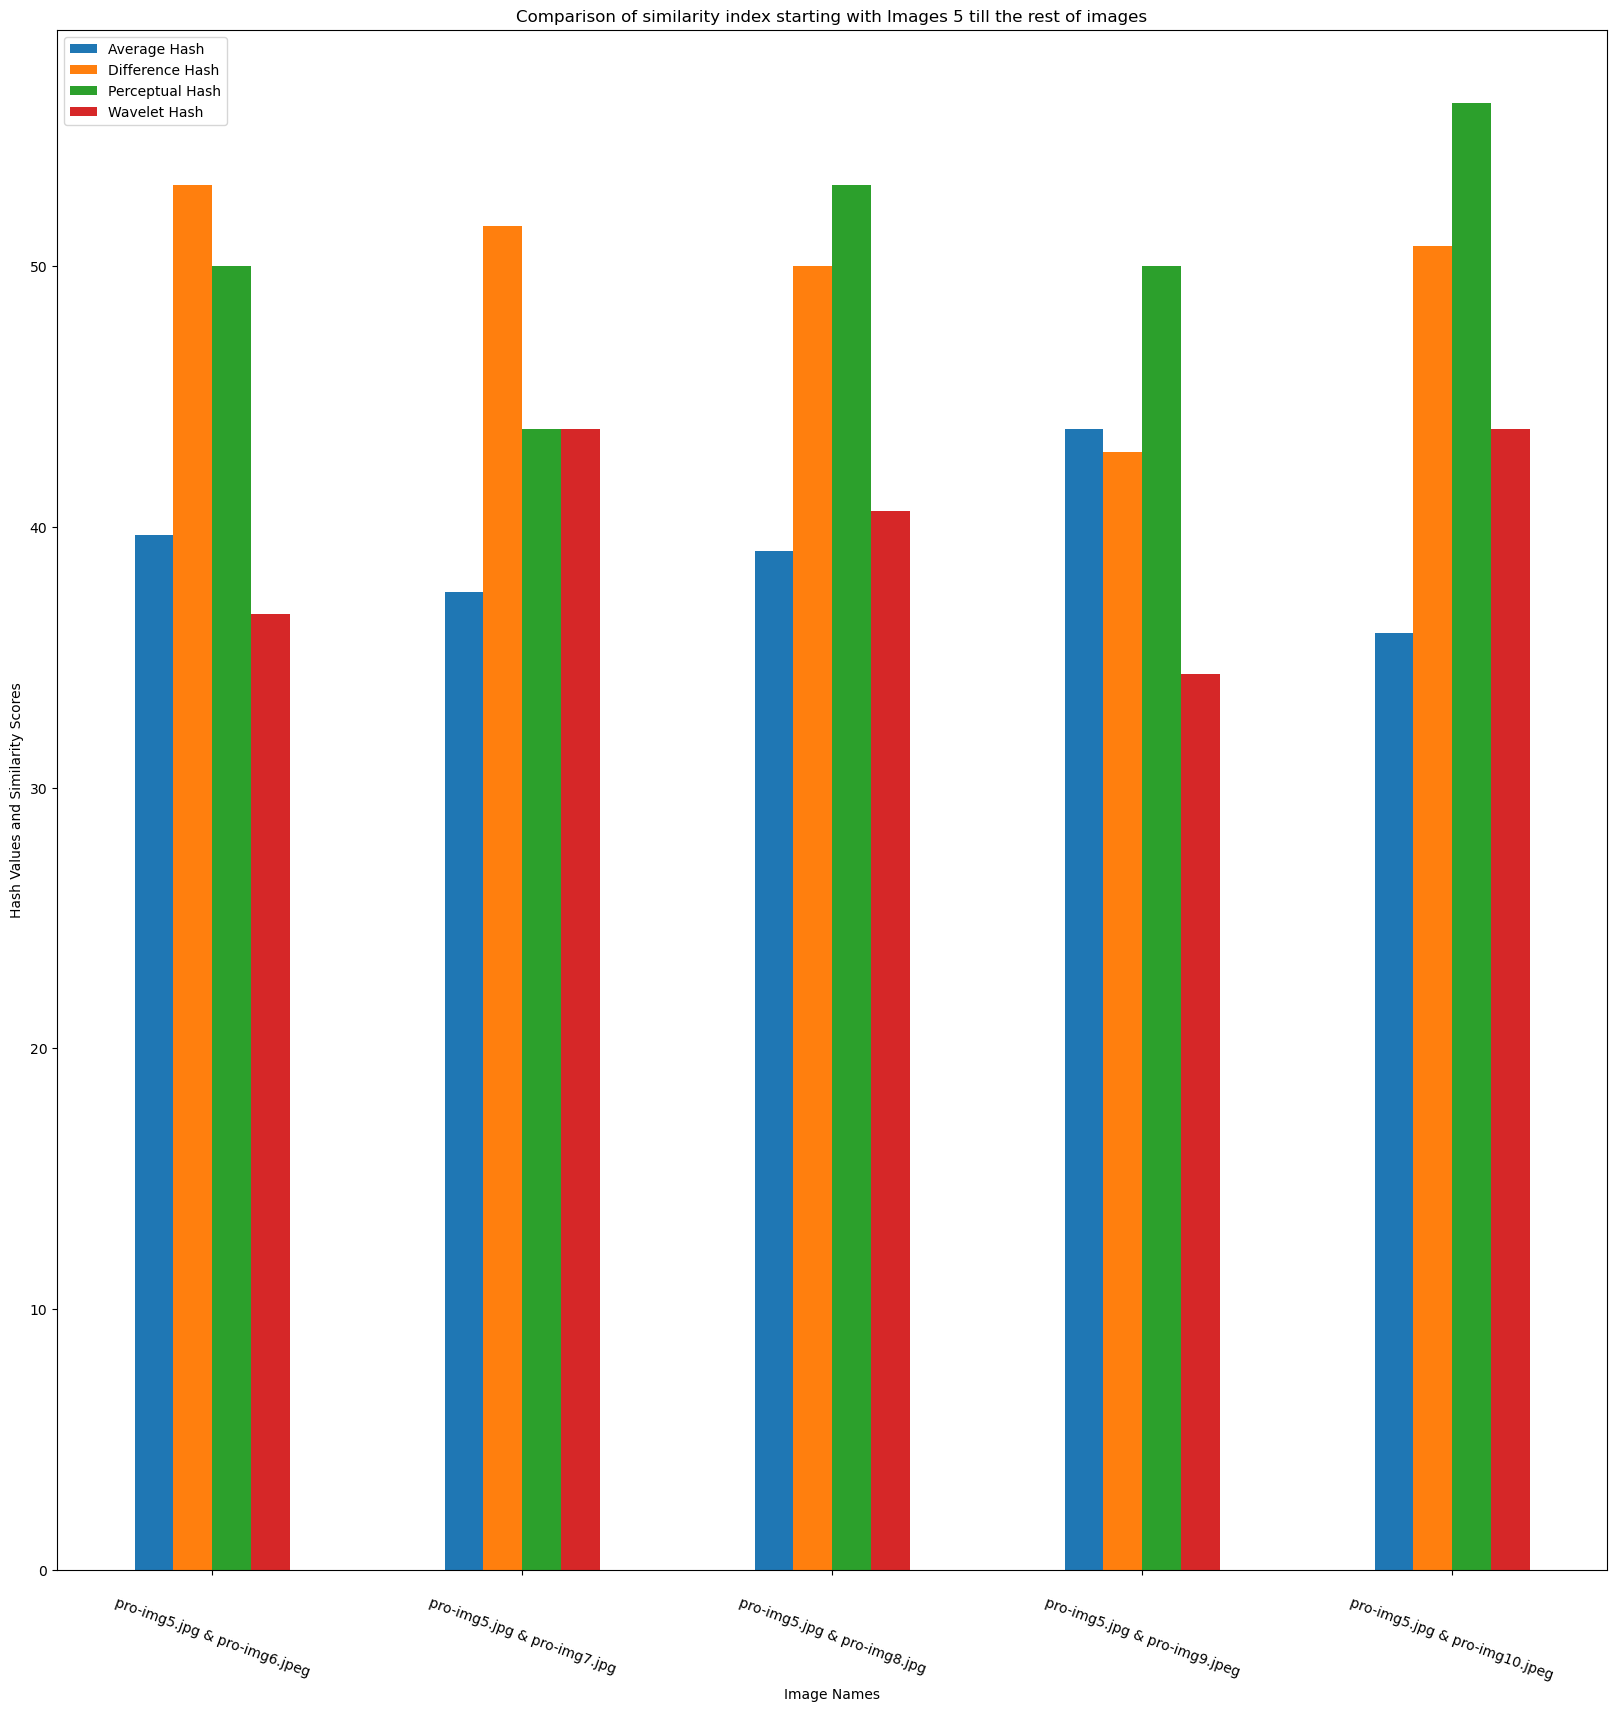

Comparison of similarity index starting with Images 6 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img6.jpeg & pro-img7.jpg,62.50,48.44,53.12,56.25
pro-img6.jpeg & pro-img8.jpg,54.69,59.38,46.88,50.00
pro-img6.jpeg & pro-img9.jpeg,37.50,46.88,53.12,46.88
pro-img6.jpeg & pro-img10.jpeg,54.69,48.44,46.88,46.88


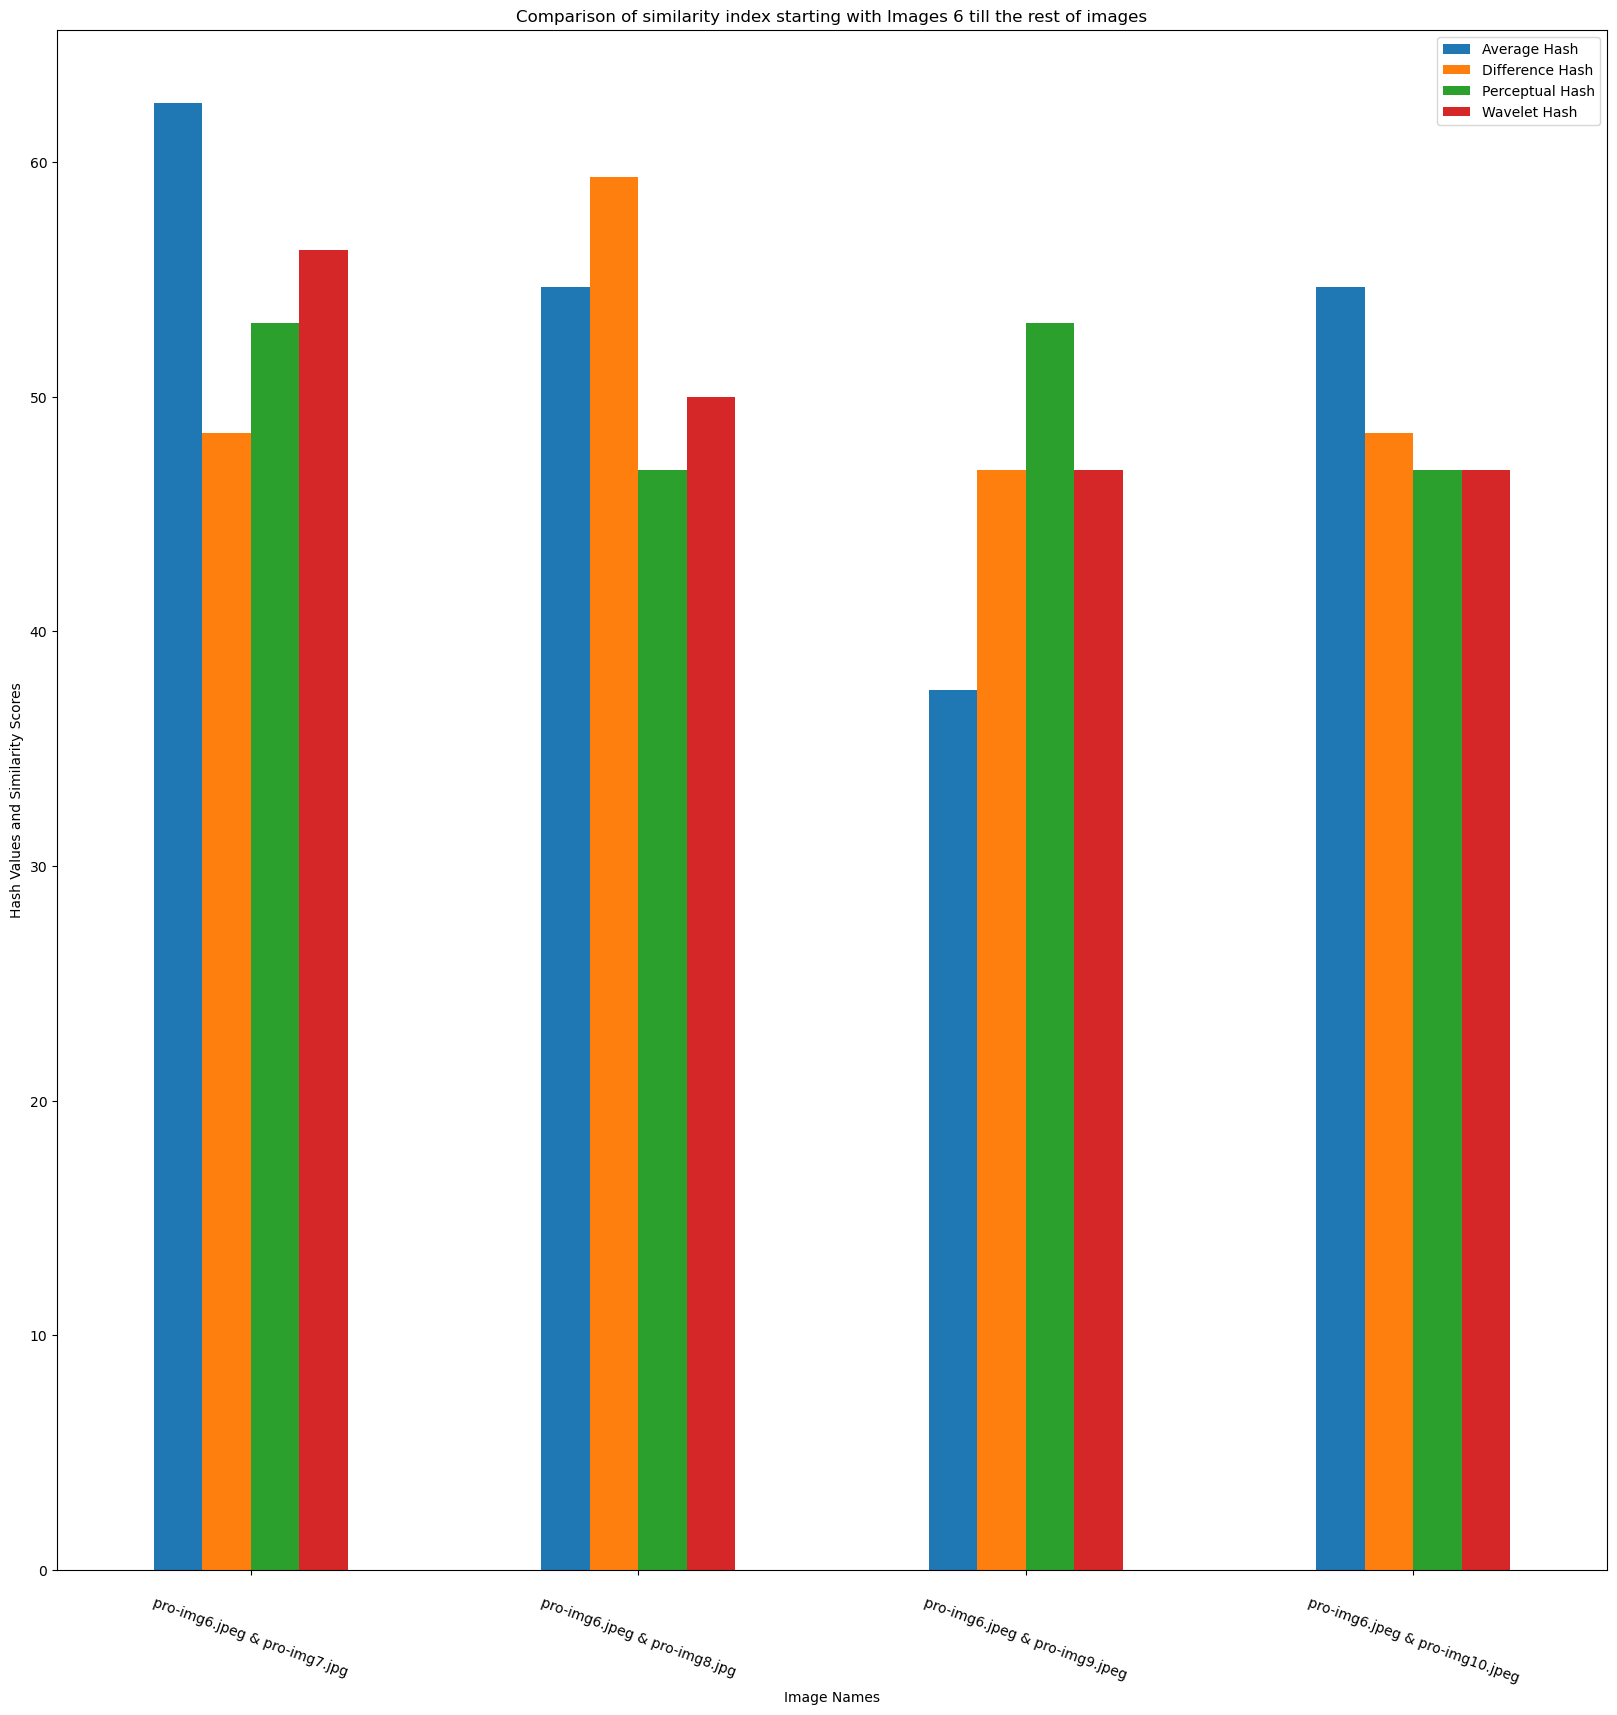

Comparison of similarity index starting with Images 7 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img7.jpg & pro-img8.jpg,51.56,45.31,50.00,53.12
pro-img7.jpg & pro-img9.jpeg,43.75,51.56,43.75,59.38
pro-img7.jpg & pro-img10.jpeg,60.94,46.88,50.00,56.25


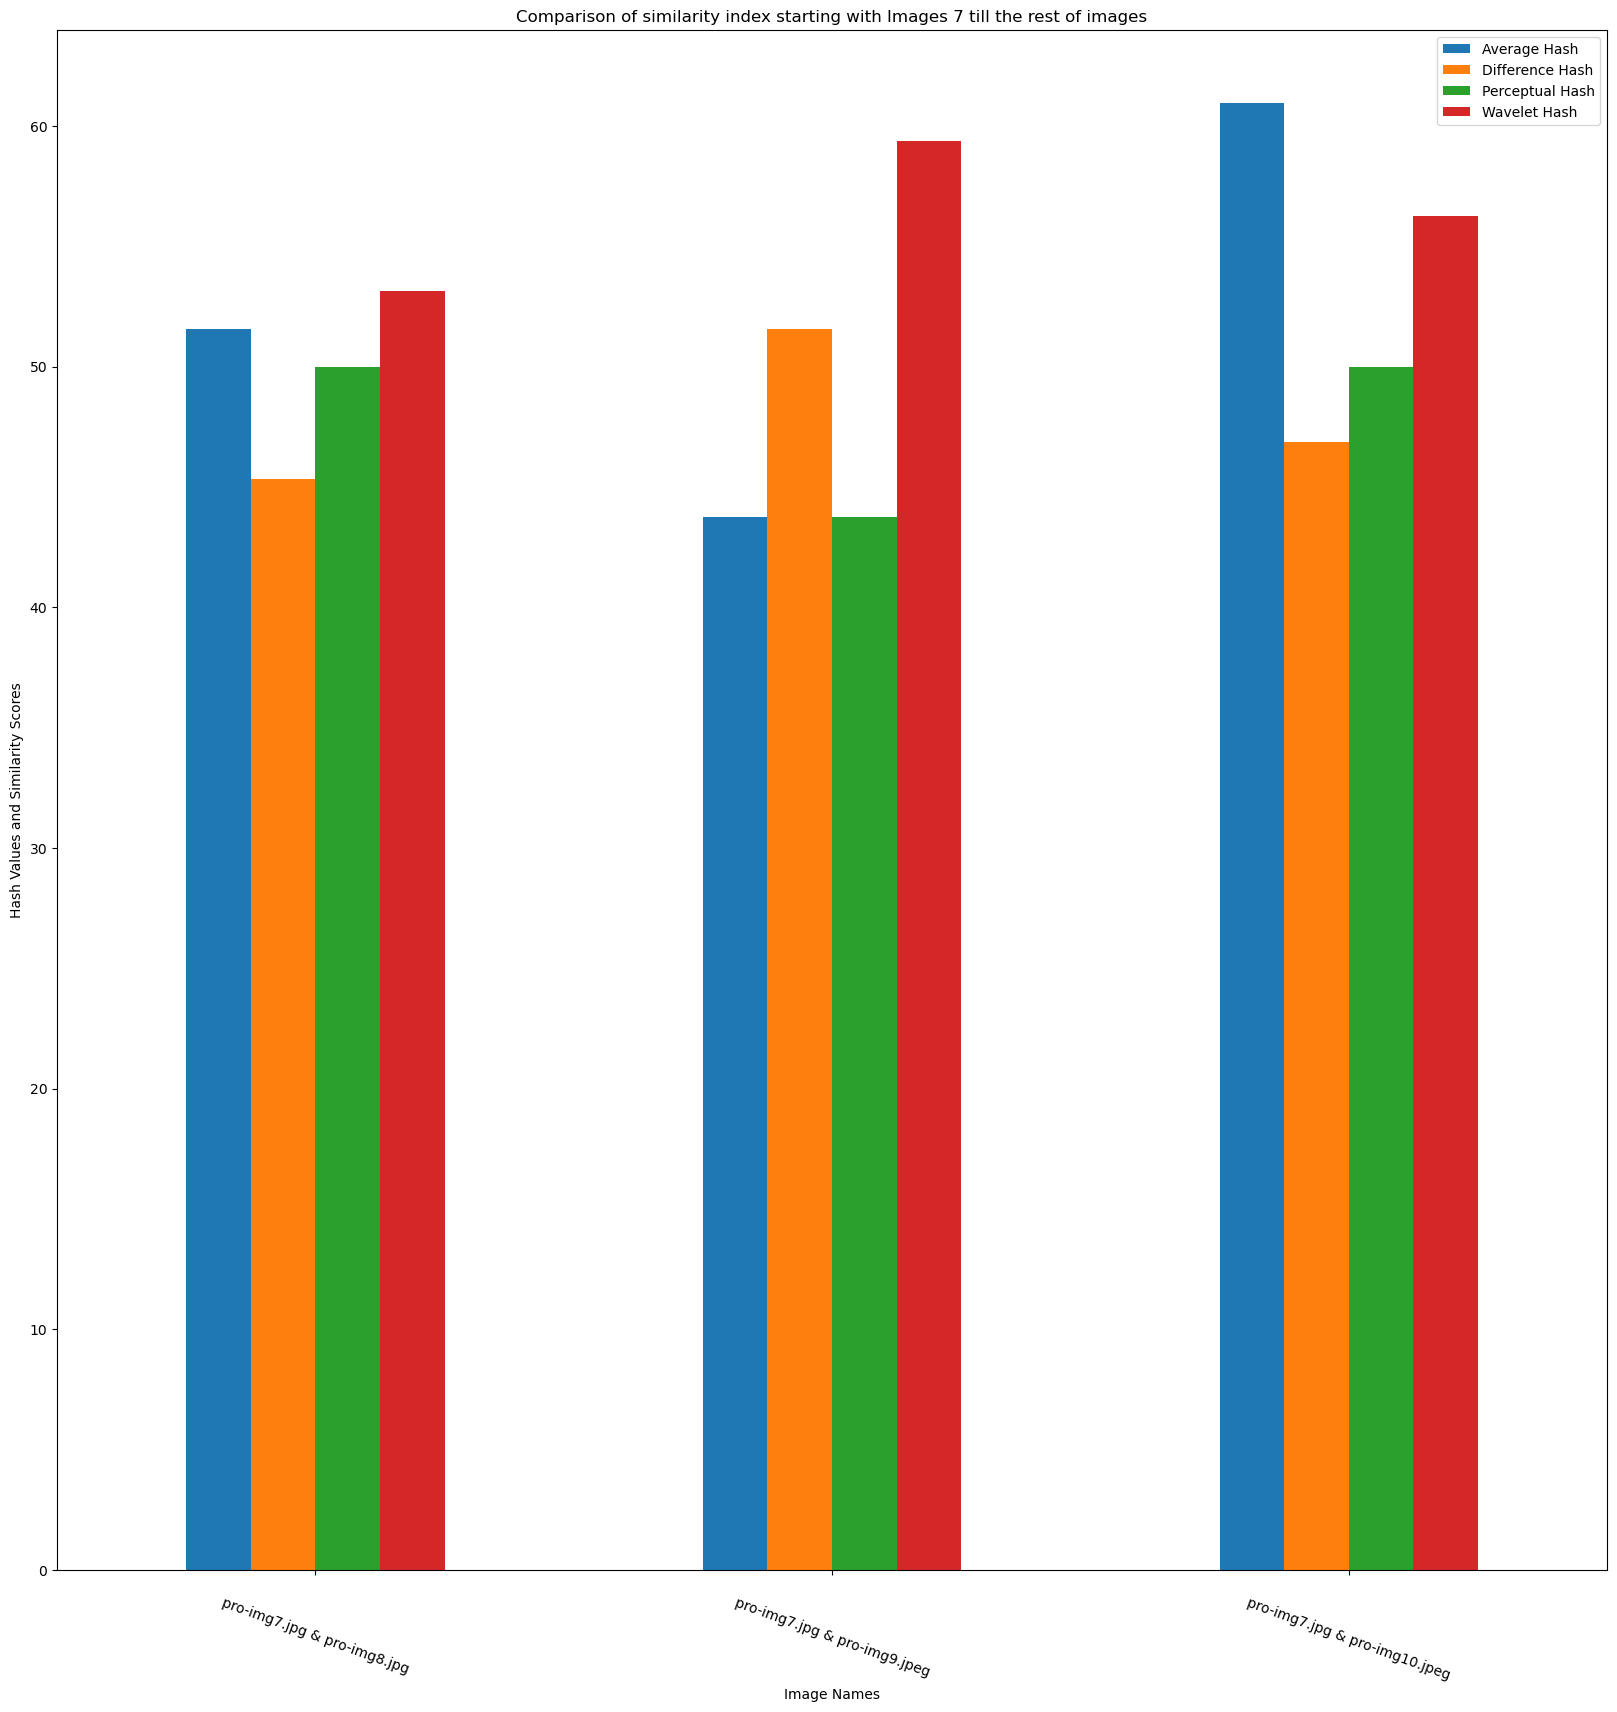

Comparison of similarity index starting with Images 8 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img8.jpg & pro-img9.jpeg,70.31,46.88,59.38,71.88
pro-img8.jpg & pro-img10.jpeg,71.88,57.81,56.25,68.75


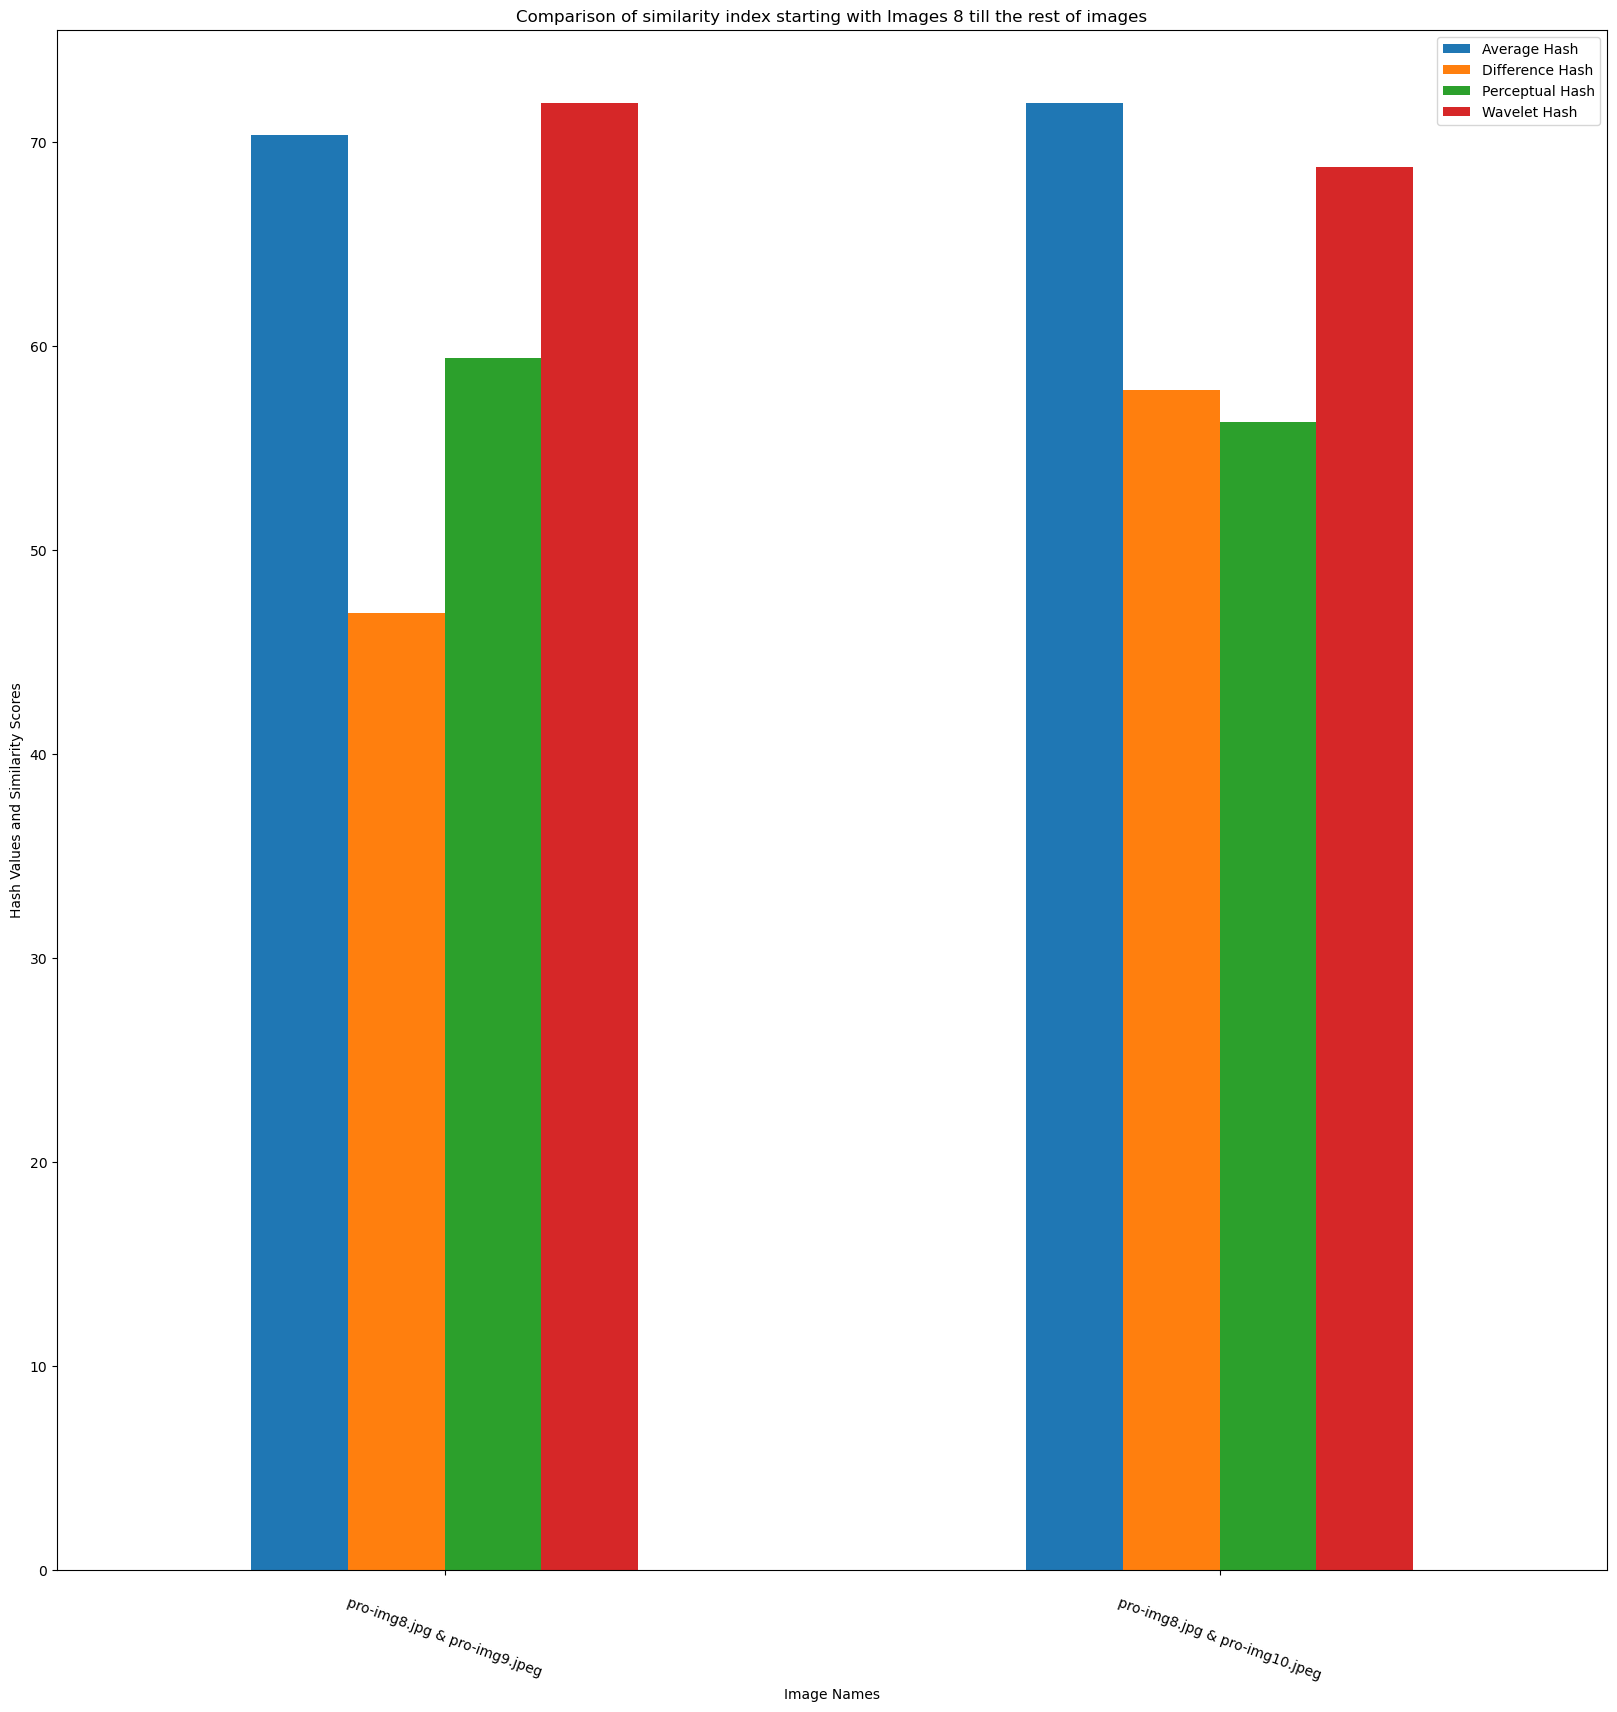

Comparison of similarity index starting with Images 9 till the rest of images


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
pro-img9.jpeg & pro-img10.jpeg,64.06,60.32,62.5,68.75


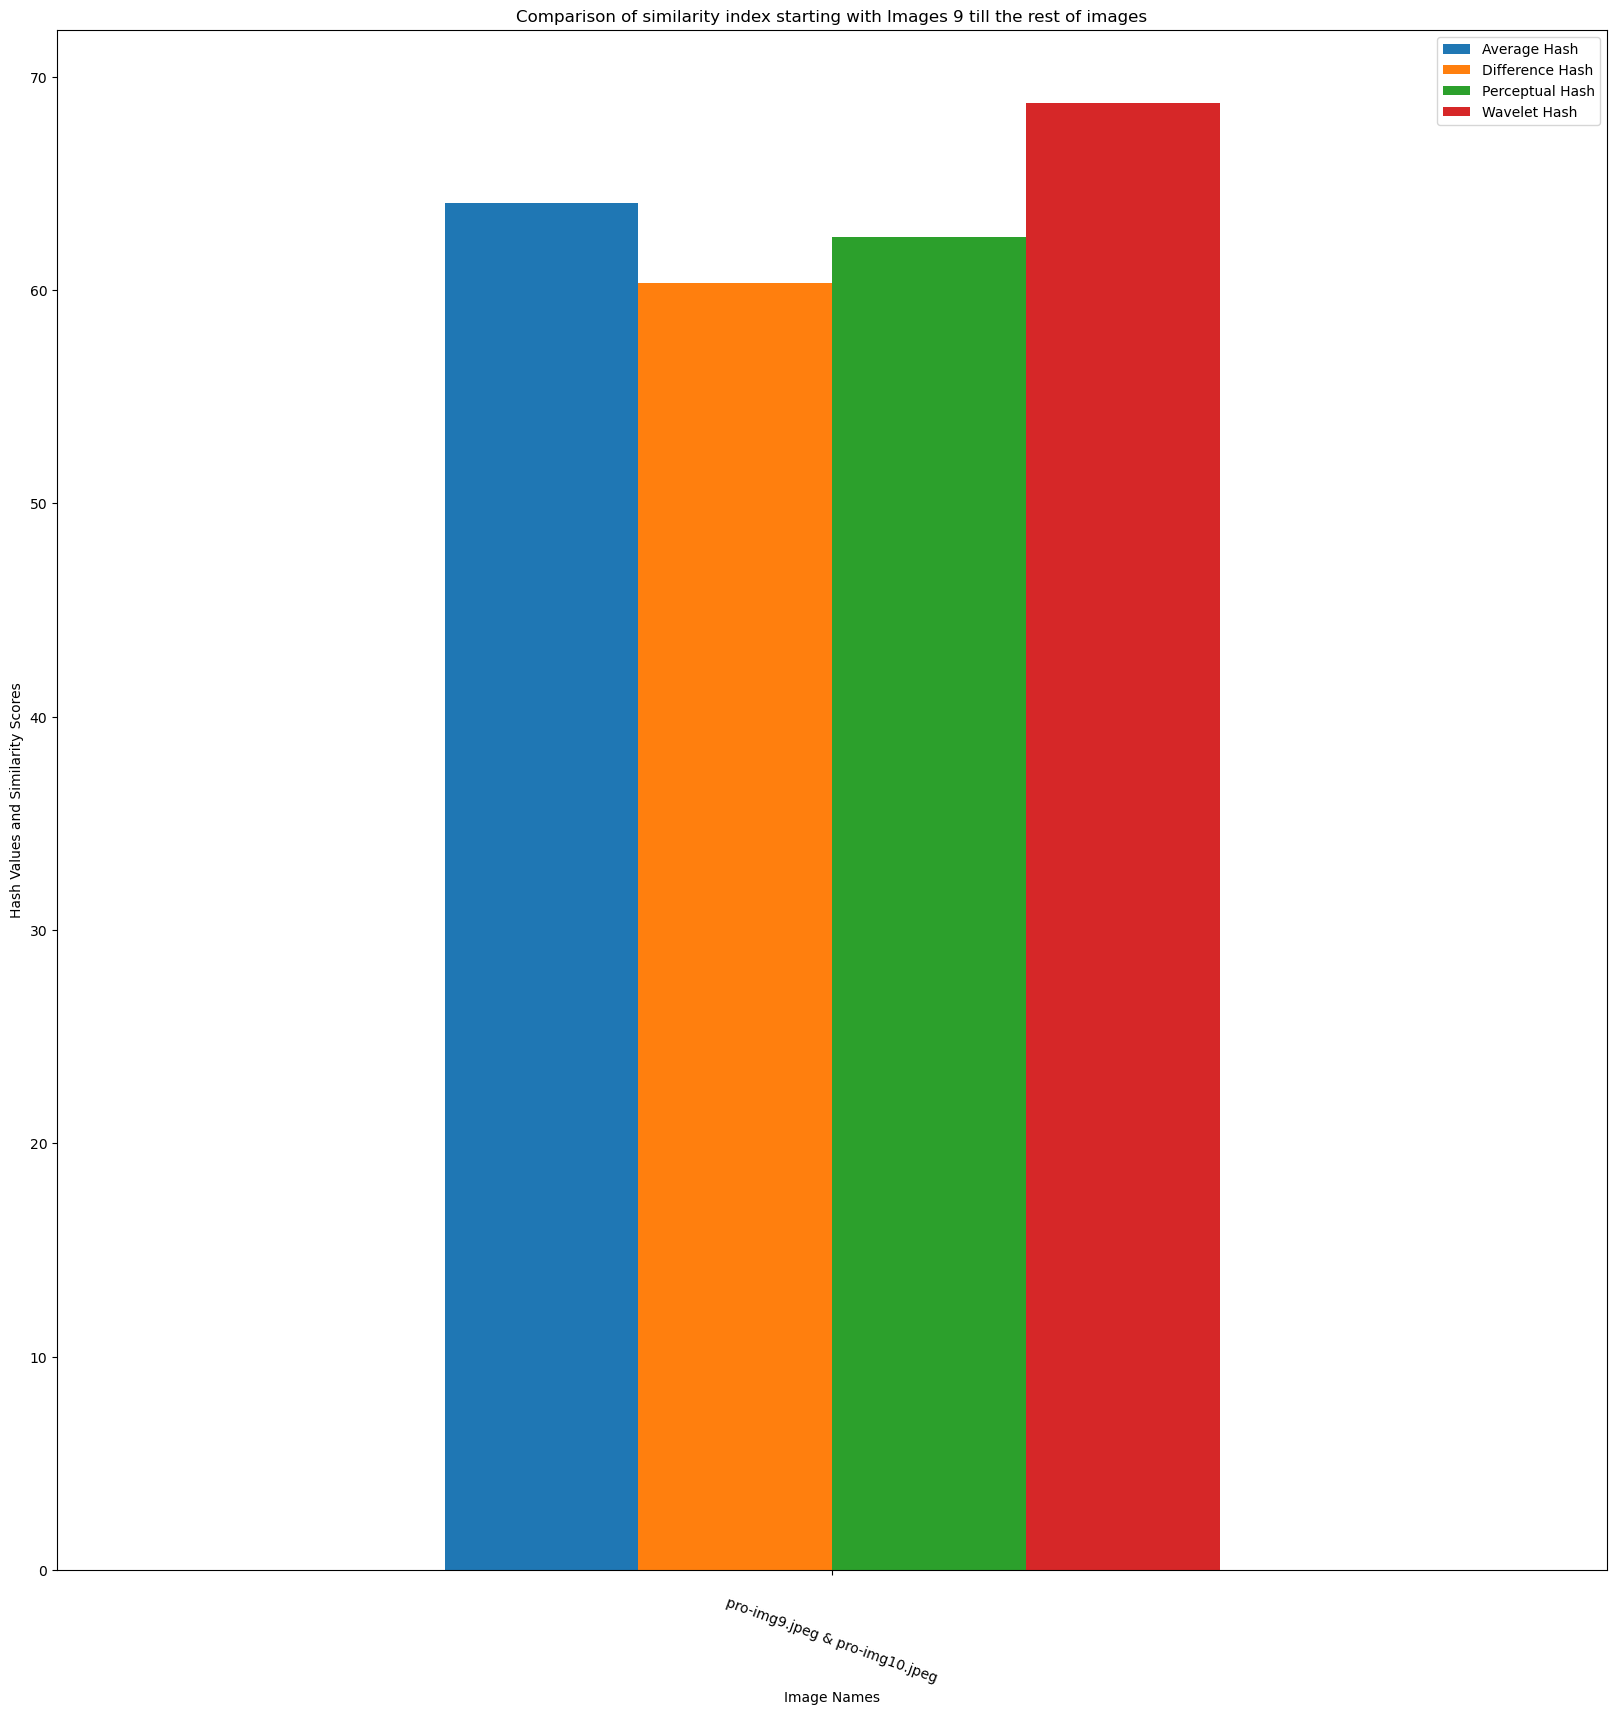

In [12]:
def first_exp(gallery = askopenfilenames()):
    
    for i in range(len(gallery)):
        
        #list of average hash
        ahashlst = list()
        #list of difference hash
        dhashlst = list()
        #list of perceptual hash
        phashlst = list()
        #list of wavelet hash
        whashlst = list()
        #list of image name
        namelst = list()
        #final result
        fin = dict()
        
        #record the index of next gallery
        if(i != (len(gallery)-1)):
            j = i + 1
        else:
            break
        
        #get file name of original image
        pro_ori_img = os.path.basename(preprocessing([gallery[i]])[0]).split('/')[-1]
        #compare the file next to current until the last file
        pro_gallery = preprocessing(gallery[j:])

        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using average hashing
        resulta = similarity(pro_ori_img,"average",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using difference hashing
        resultd = similarity(pro_ori_img,"difference",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using perceptual hashing
        resultp = similarity(pro_ori_img,"perceptual",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using wavelet hashing
        resultw = similarity(pro_ori_img,"wavelet",pro_gallery)
        
        count = 0
        for key,content in resulta.items():
            #appending average hash value
            ahashlst.append(content)
            #appending image name
            namelst.append(key)
        
        for key,content in resultd.items():
            #appending difference hash value
            dhashlst.append(content)
        
        for key,content in resultp.items():
            #appending perceptual hash value
            phashlst.append(content)
            
        for key,content in resultw.items():
            #appending wavelet hash value
            whashlst.append(content)
        
        key = ["Average Hash","Difference Hash","Perceptual Hash","Wavelet Hash"]
        for j in range(len(ahashlst)):
            fin[namelst[j]] = list([ahashlst[j],dhashlst[j],phashlst[j],whashlst[j]])

        #creating a pandas dataframe
        df = pandas.DataFrame(fin,index=key)
        table = df.T
        
        counter = int(i)+1
        #creating a bar chart
        ax = table.plot(kind='bar', figsize=(20, 20))
        ax.set_title("Comparison of similarity index starting with Images "+str(counter)+" till the rest of images")
        ax.set_xlabel('Image Names')
        ax.set_ylabel('Hash Values and Similarity Scores')
        ax.tick_params(axis='x', labelrotation=340,pad=15)

        print("Comparison of similarity index starting with Images "+str(counter)+" till the rest of images")
        #display table
        display(table)
        #show chart
        plt.show(ax)
        
#     plt.savefig(location+'chart1.png')
#     return table,ax
first_exp() 

Comparison of similarity index among Images 1


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img1.jpeg & pro-img1.jpeg,95.31,100.00,96.88,93.75
img1.jpeg & pro-bright1-img1.jpeg,89.06,93.75,93.75,90.62
img1.jpeg & pro-bright2-img1.jpeg,98.44,100.00,96.88,93.75
img1.jpeg & pro-constrast1-img1.jpeg,98.44,98.44,96.88,93.75
img1.jpeg & pro-constrast2-img1.jpeg,98.44,98.44,100.00,93.75
img1.jpeg & pro-blur-img1.jpeg,96.88,98.44,96.88,93.75


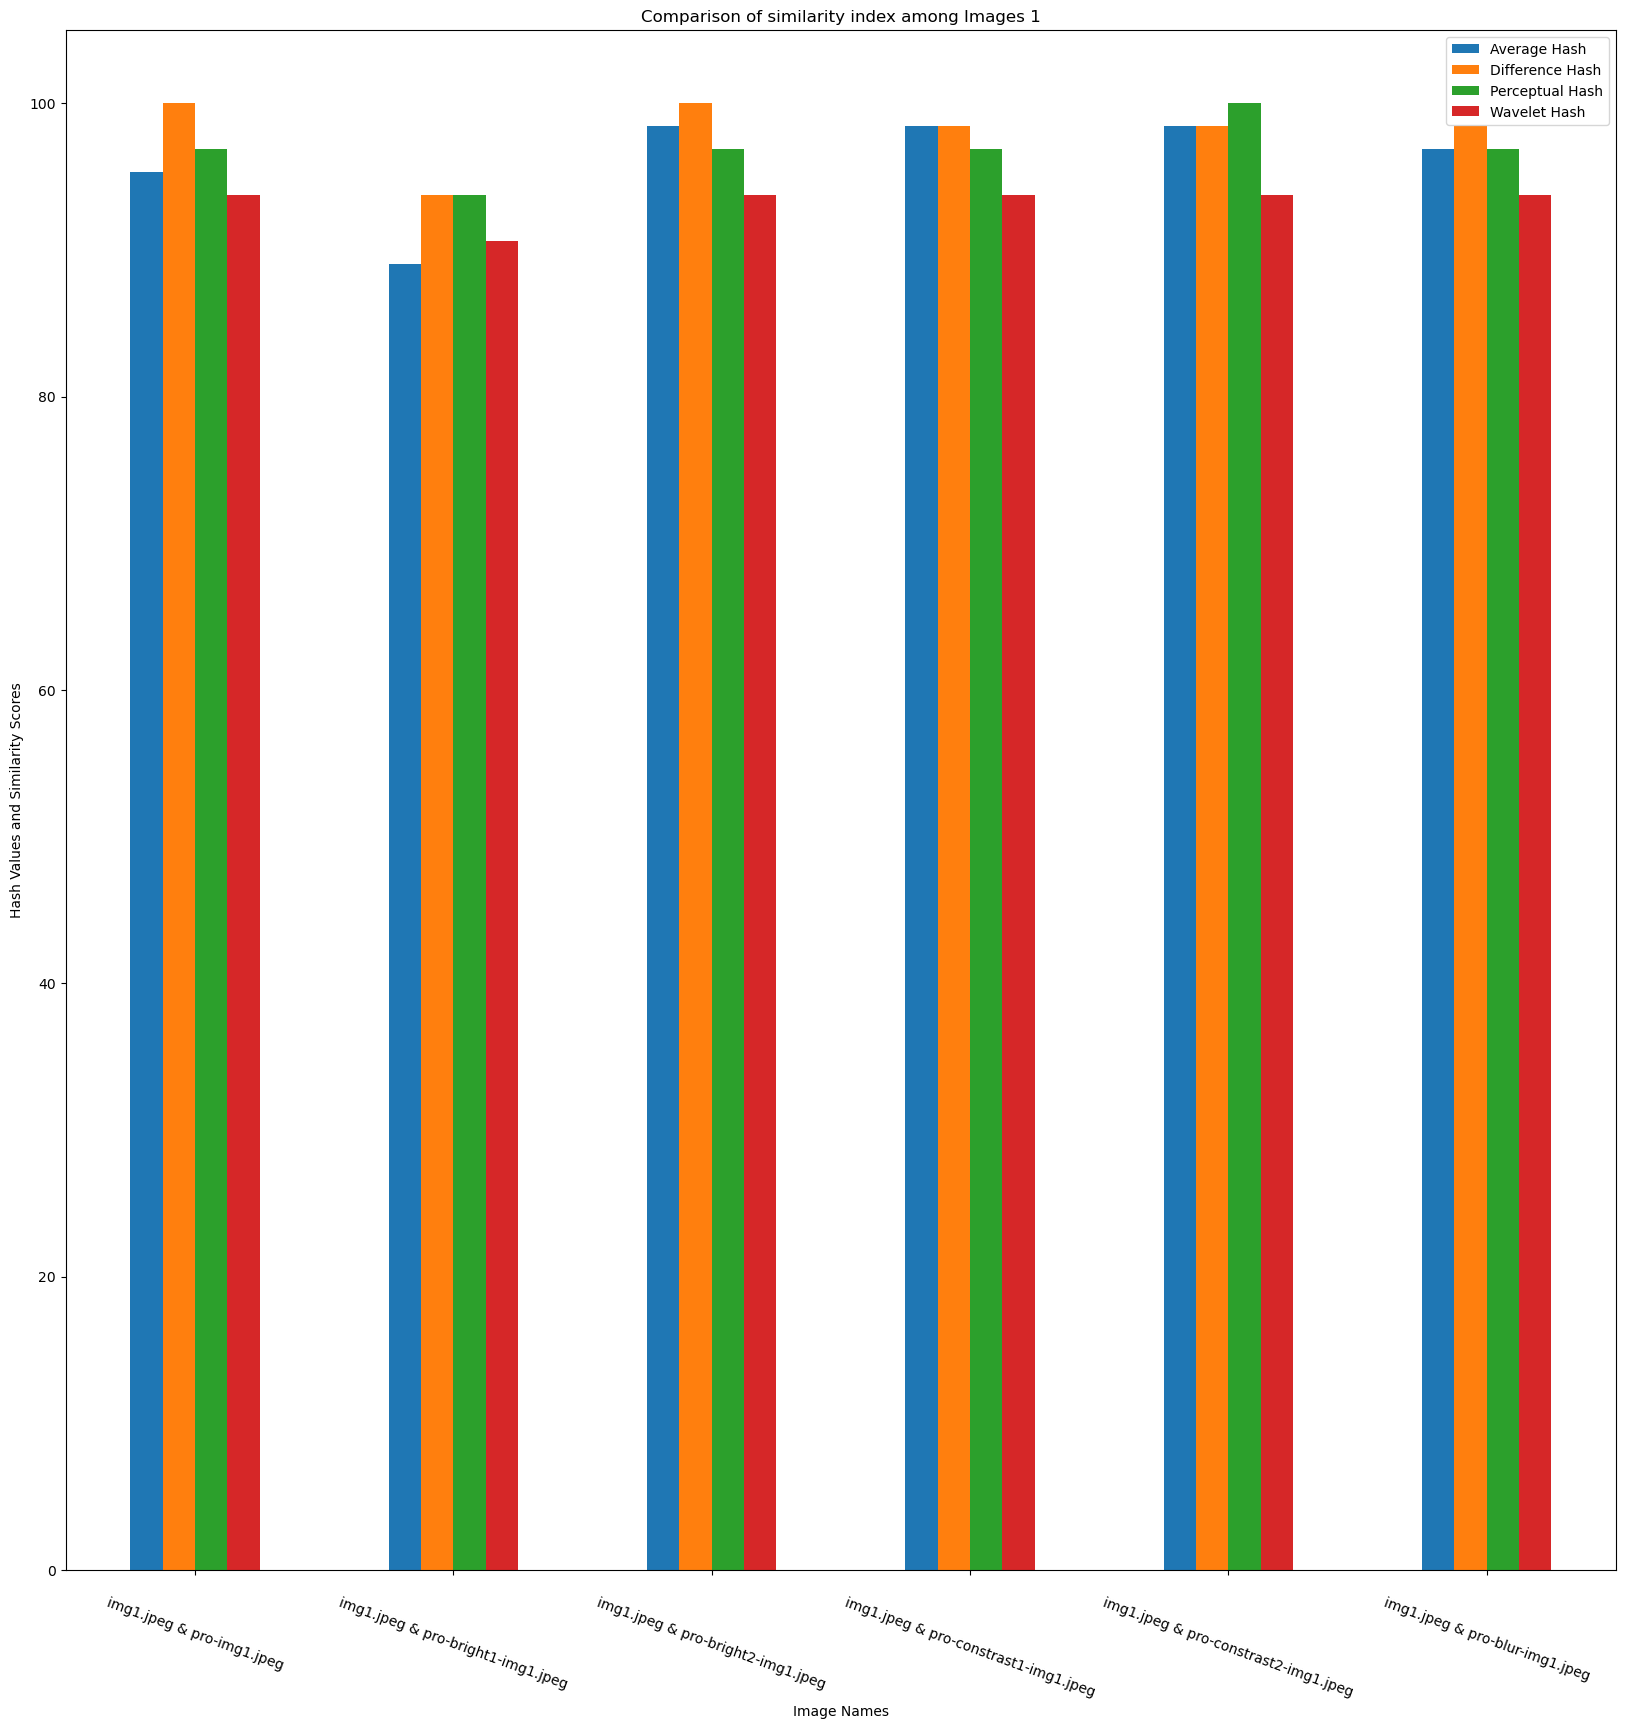

Comparison of similarity index among Images 2


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img2.jpg & pro-img2.jpg,98.39,100.00,96.88,100.00
img2.jpg & pro-bright1-img2.jpg,93.55,100.00,90.62,96.77
img2.jpg & pro-bright2-img2.jpg,96.77,100.00,96.88,100.00
img2.jpg & pro-constrast1-img2.jpg,96.77,100.00,96.88,100.00
img2.jpg & pro-constrast2-img2.jpg,98.39,98.41,96.88,100.00
img2.jpg & pro-blur-img2.jpg,96.77,100.00,96.88,100.00


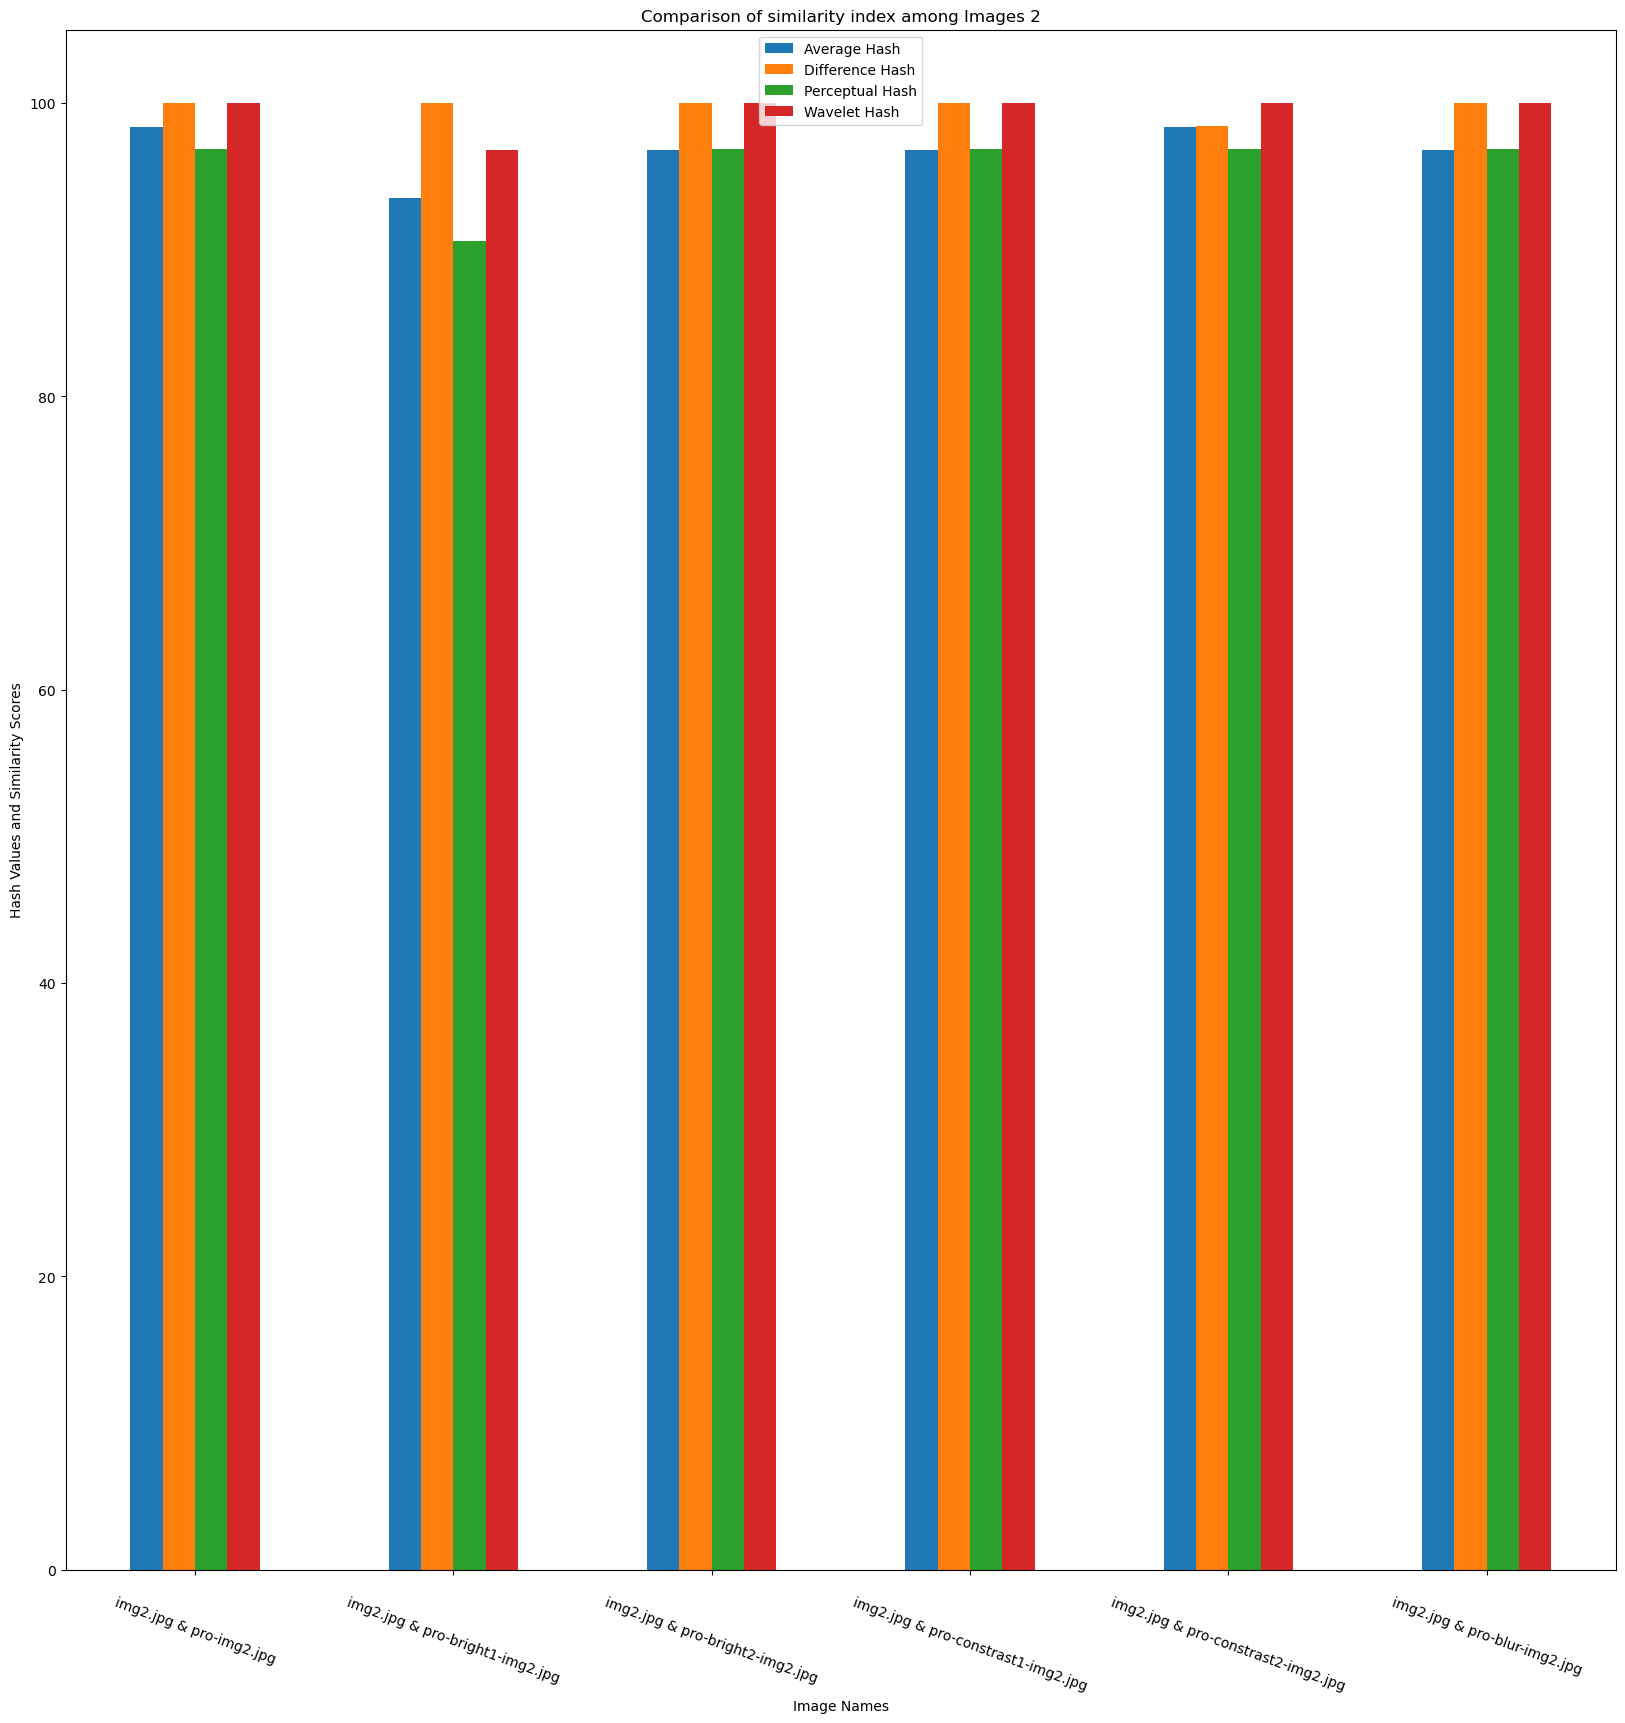

Comparison of similarity index among Images 3


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img3.jpg & pro-img3.jpg,98.41,95.31,96.88,96.88
img3.jpg & pro-bright1-img3.jpg,96.83,85.94,96.88,93.65
img3.jpg & pro-bright2-img3.jpg,98.41,93.75,93.75,96.88
img3.jpg & pro-constrast1-img3.jpg,98.41,96.88,96.88,96.88
img3.jpg & pro-constrast2-img3.jpg,98.41,92.19,90.62,96.88
img3.jpg & pro-blur-img3.jpg,98.41,95.31,96.88,100.00


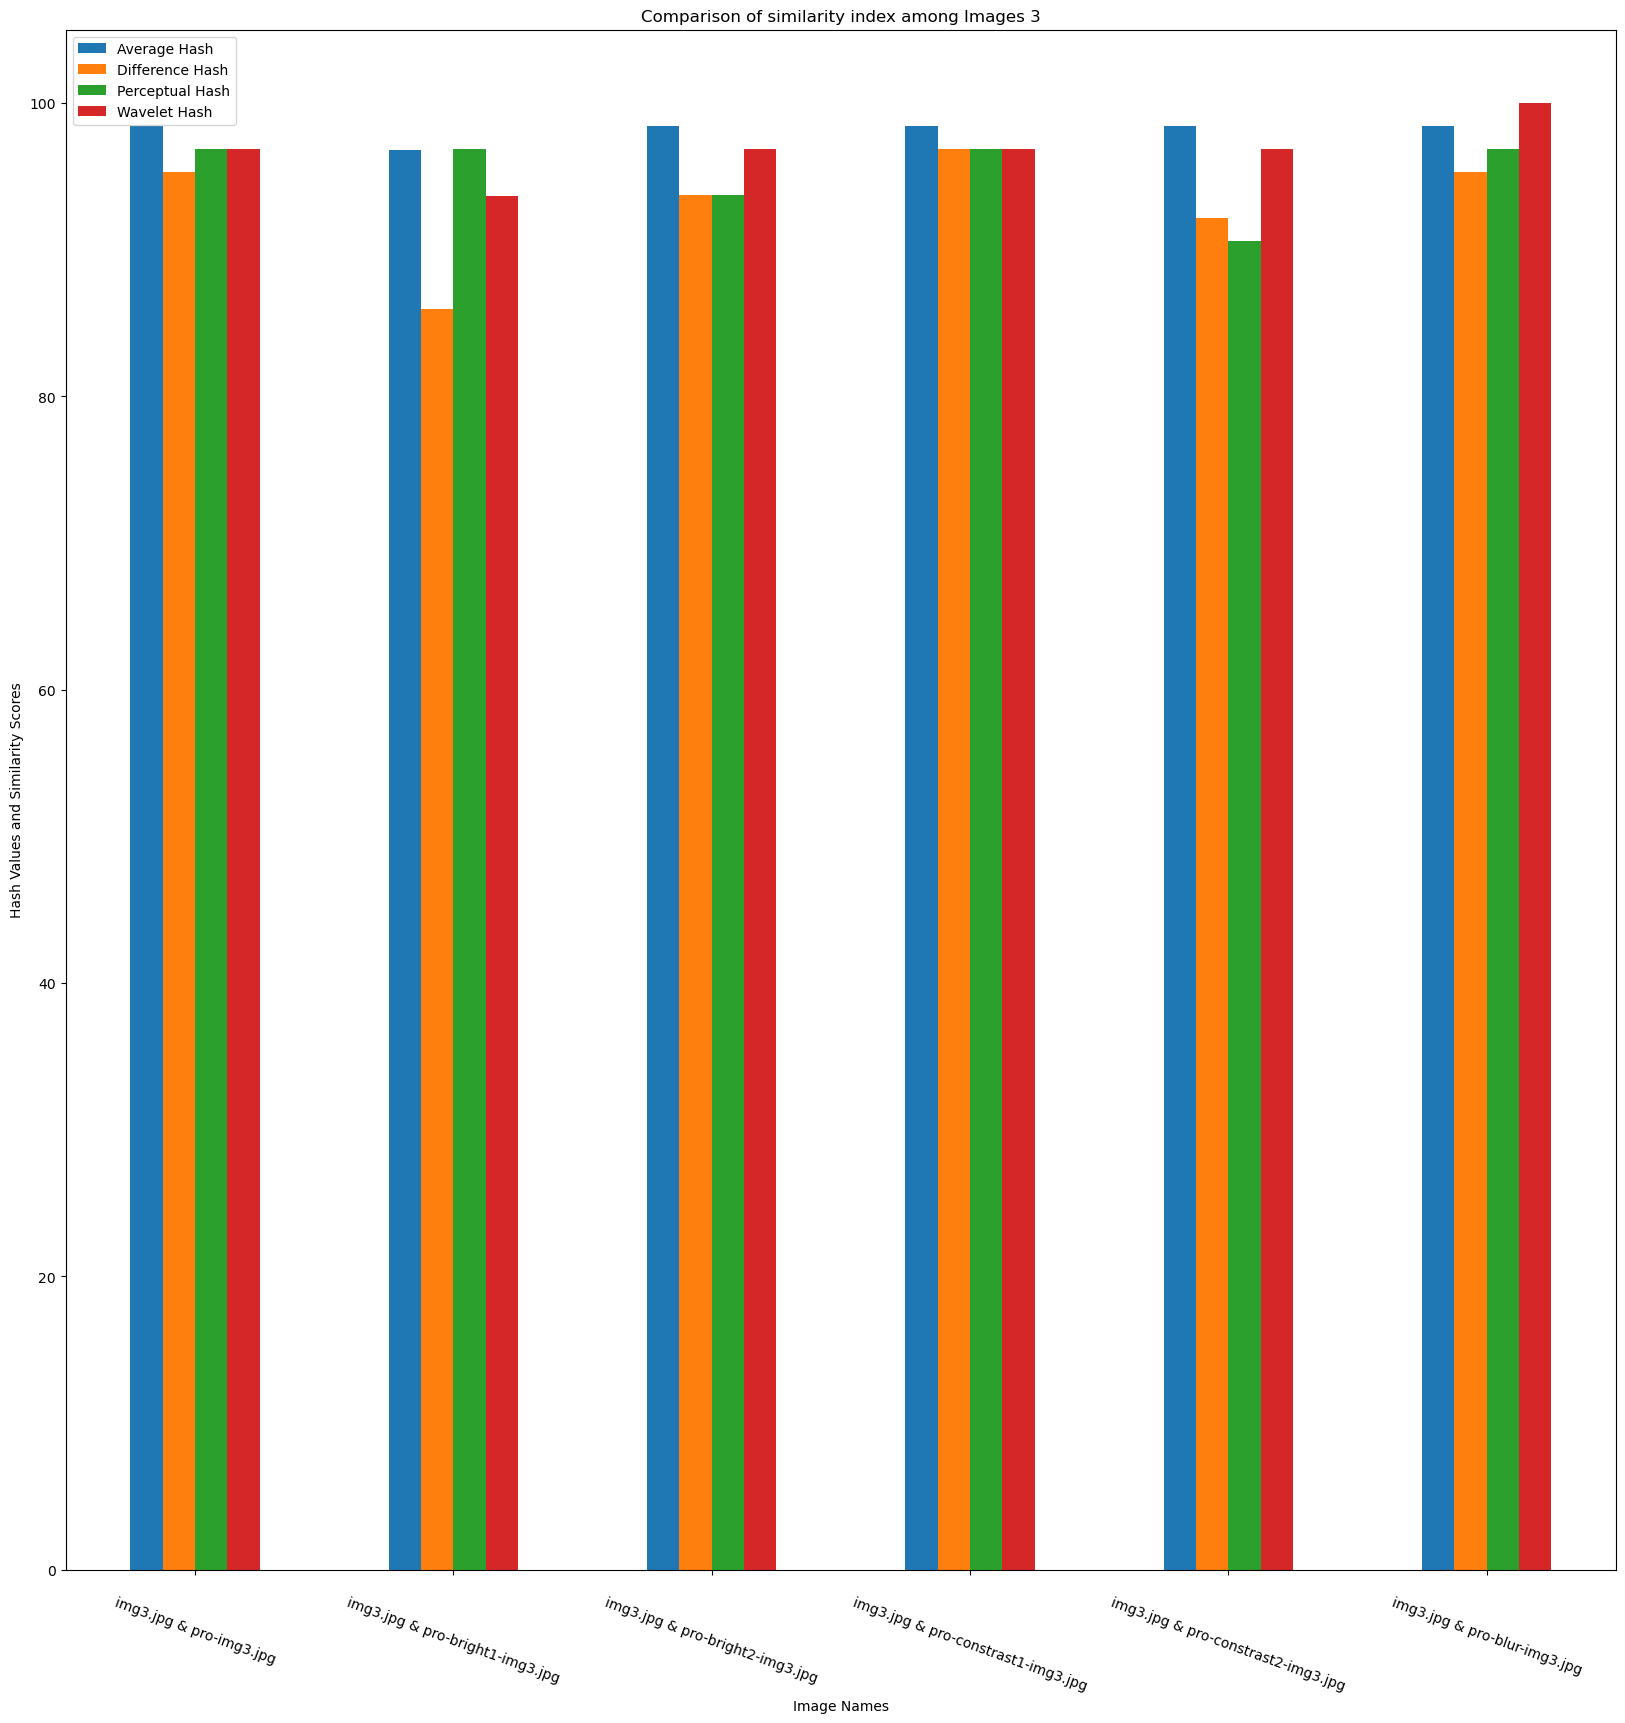

Comparison of similarity index among Images 4


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img4.jpeg & pro-img4.jpeg,100.00,95.24,96.88,100.00
img4.jpeg & pro-bright1-img4.jpeg,93.33,90.48,90.62,90.16
img4.jpeg & pro-bright2-img4.jpeg,96.67,96.83,87.50,100.00
img4.jpeg & pro-constrast1-img4.jpeg,100.00,93.65,96.88,100.00
img4.jpeg & pro-constrast2-img4.jpeg,95.08,92.06,87.50,100.00
img4.jpeg & pro-blur-img4.jpeg,98.33,96.83,96.88,100.00


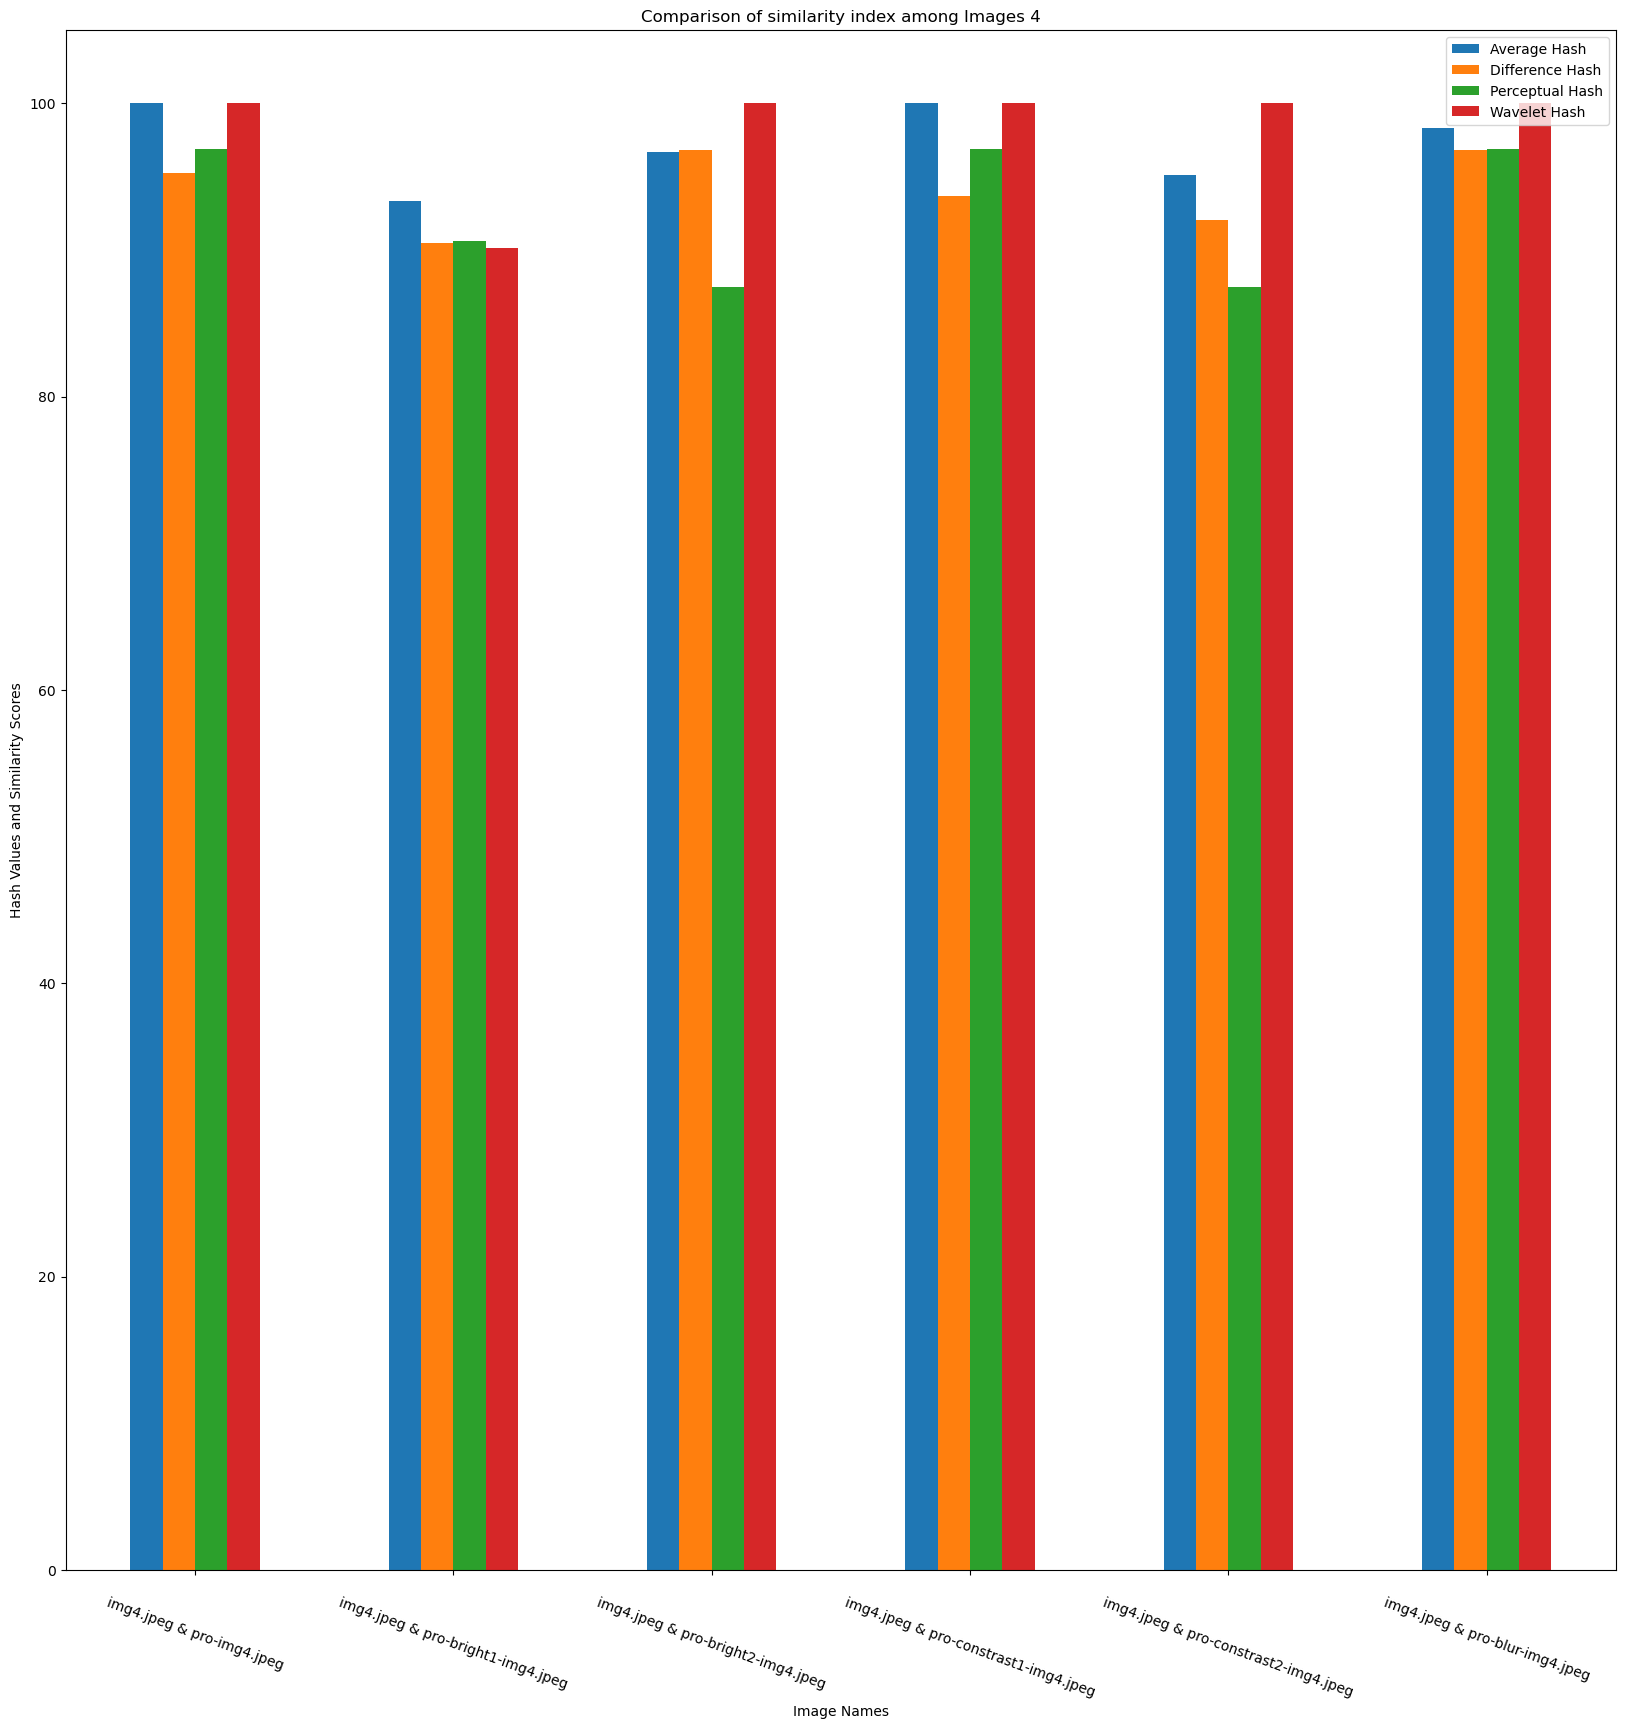

Comparison of similarity index among Images 5


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img5.jpg & pro-img5.jpg,100.00,100.00,96.88,96.61
img5.jpg & pro-bright1-img5.jpg,84.62,79.37,84.38,79.66
img5.jpg & pro-bright2-img5.jpg,100.00,100.00,96.88,96.61
img5.jpg & pro-constrast1-img5.jpg,100.00,98.44,96.88,96.61
img5.jpg & pro-constrast2-img5.jpg,100.00,98.44,96.88,96.61
img5.jpg & pro-blur-img5.jpg,100.00,100.00,96.88,96.61


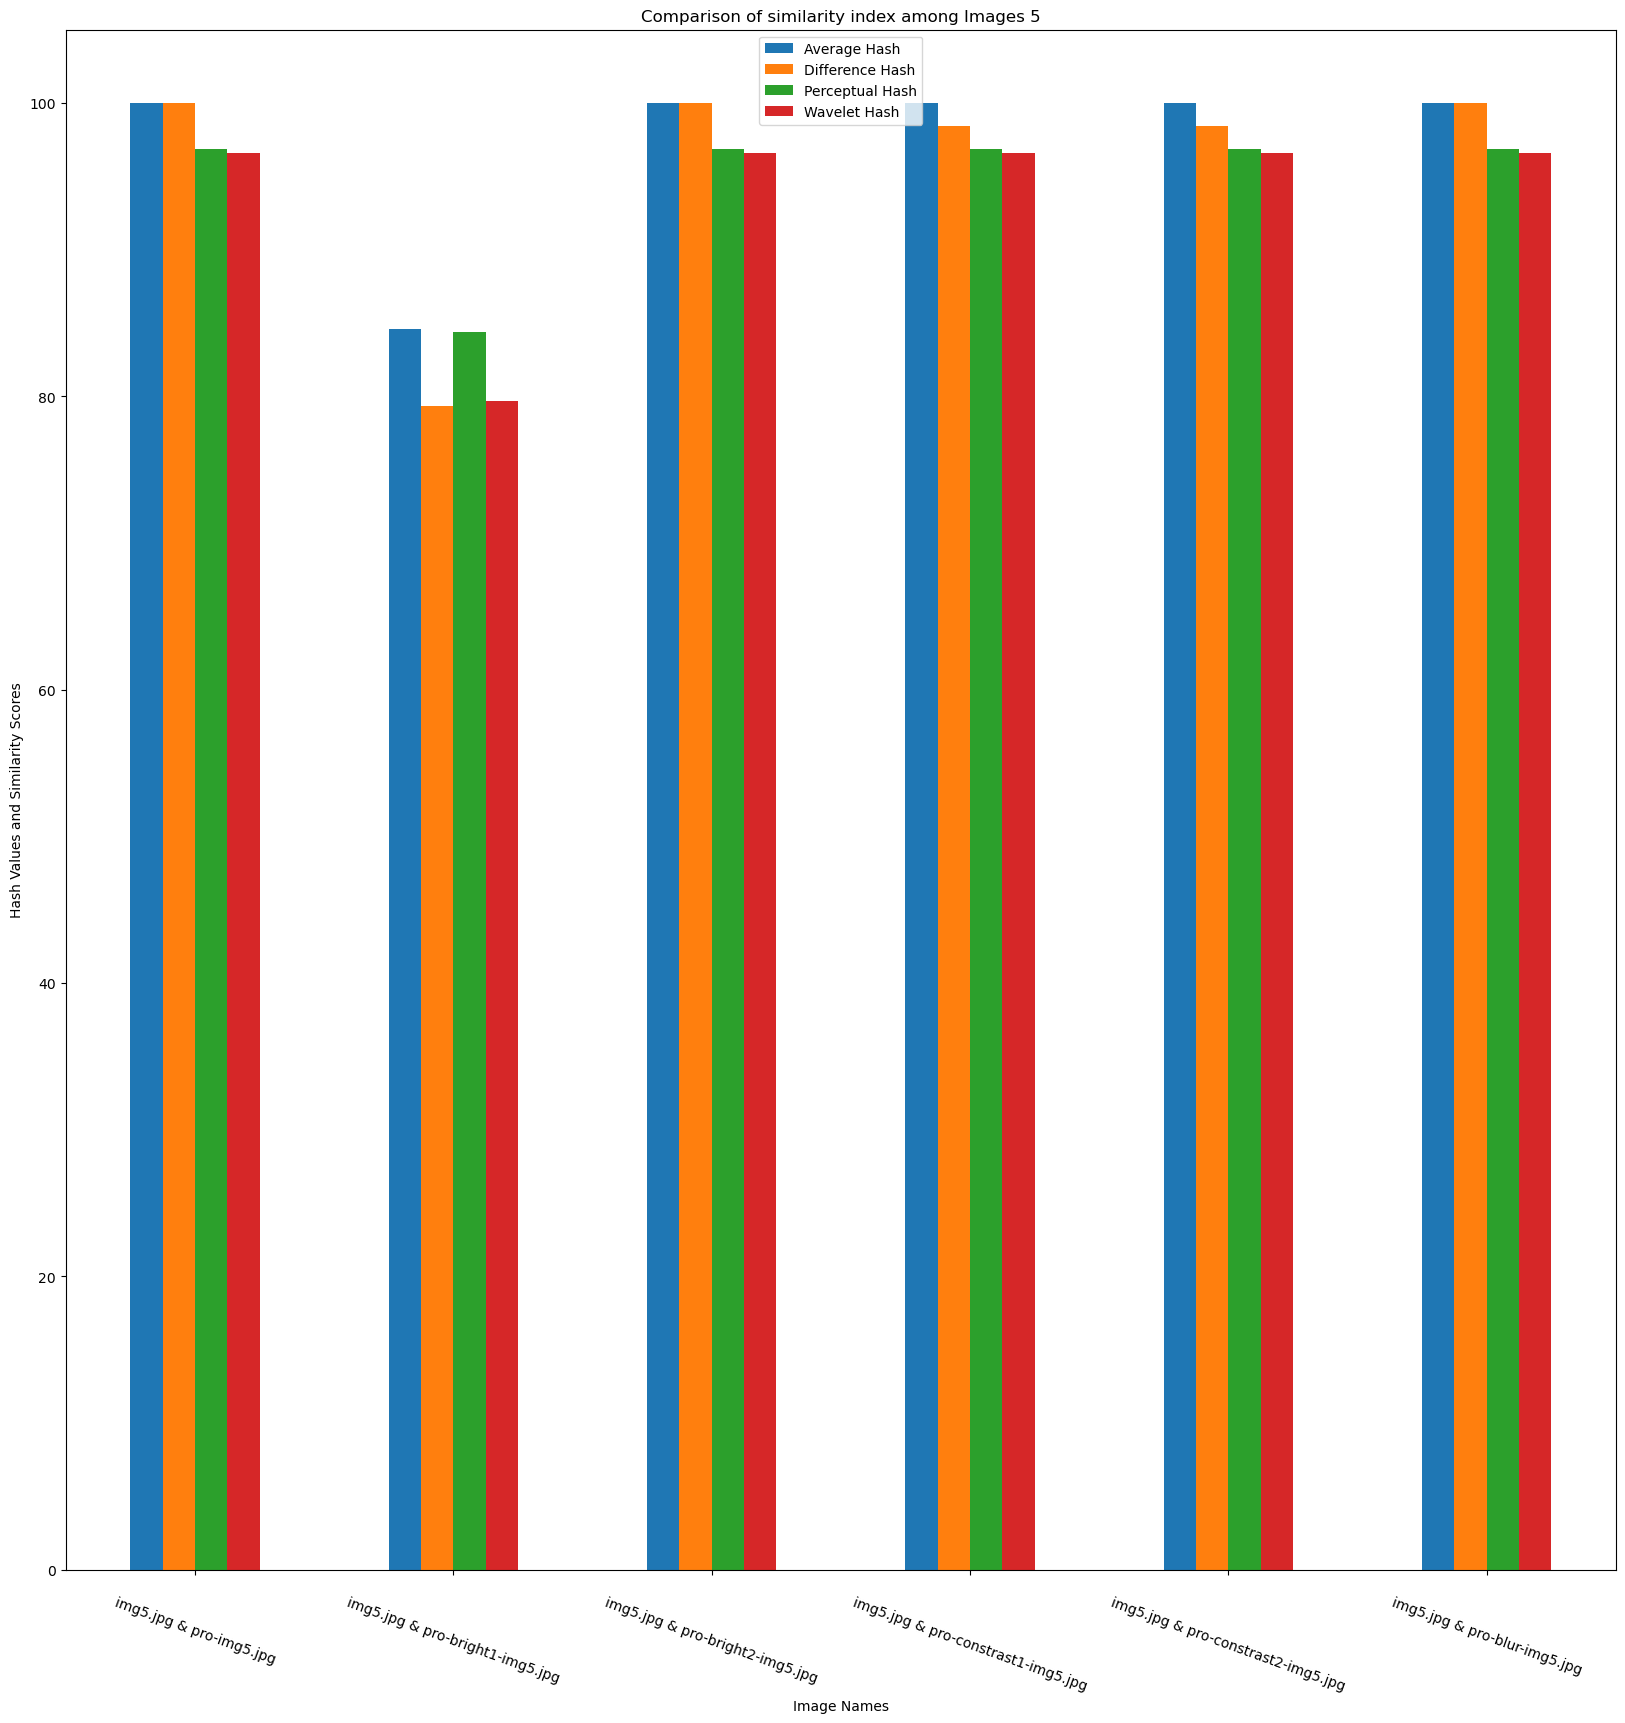

Comparison of similarity index among Images 6


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img6.jpeg & pro-img6.jpeg,100.00,98.44,100.00,93.65
img6.jpeg & pro-bright1-img6.jpeg,98.41,98.44,96.88,90.48
img6.jpeg & pro-bright2-img6.jpeg,100.00,96.88,96.88,96.83
img6.jpeg & pro-constrast1-img6.jpeg,98.41,98.44,100.00,93.65
img6.jpeg & pro-constrast2-img6.jpeg,98.41,96.88,93.75,100.00
img6.jpeg & pro-blur-img6.jpeg,100.00,96.88,100.00,90.48


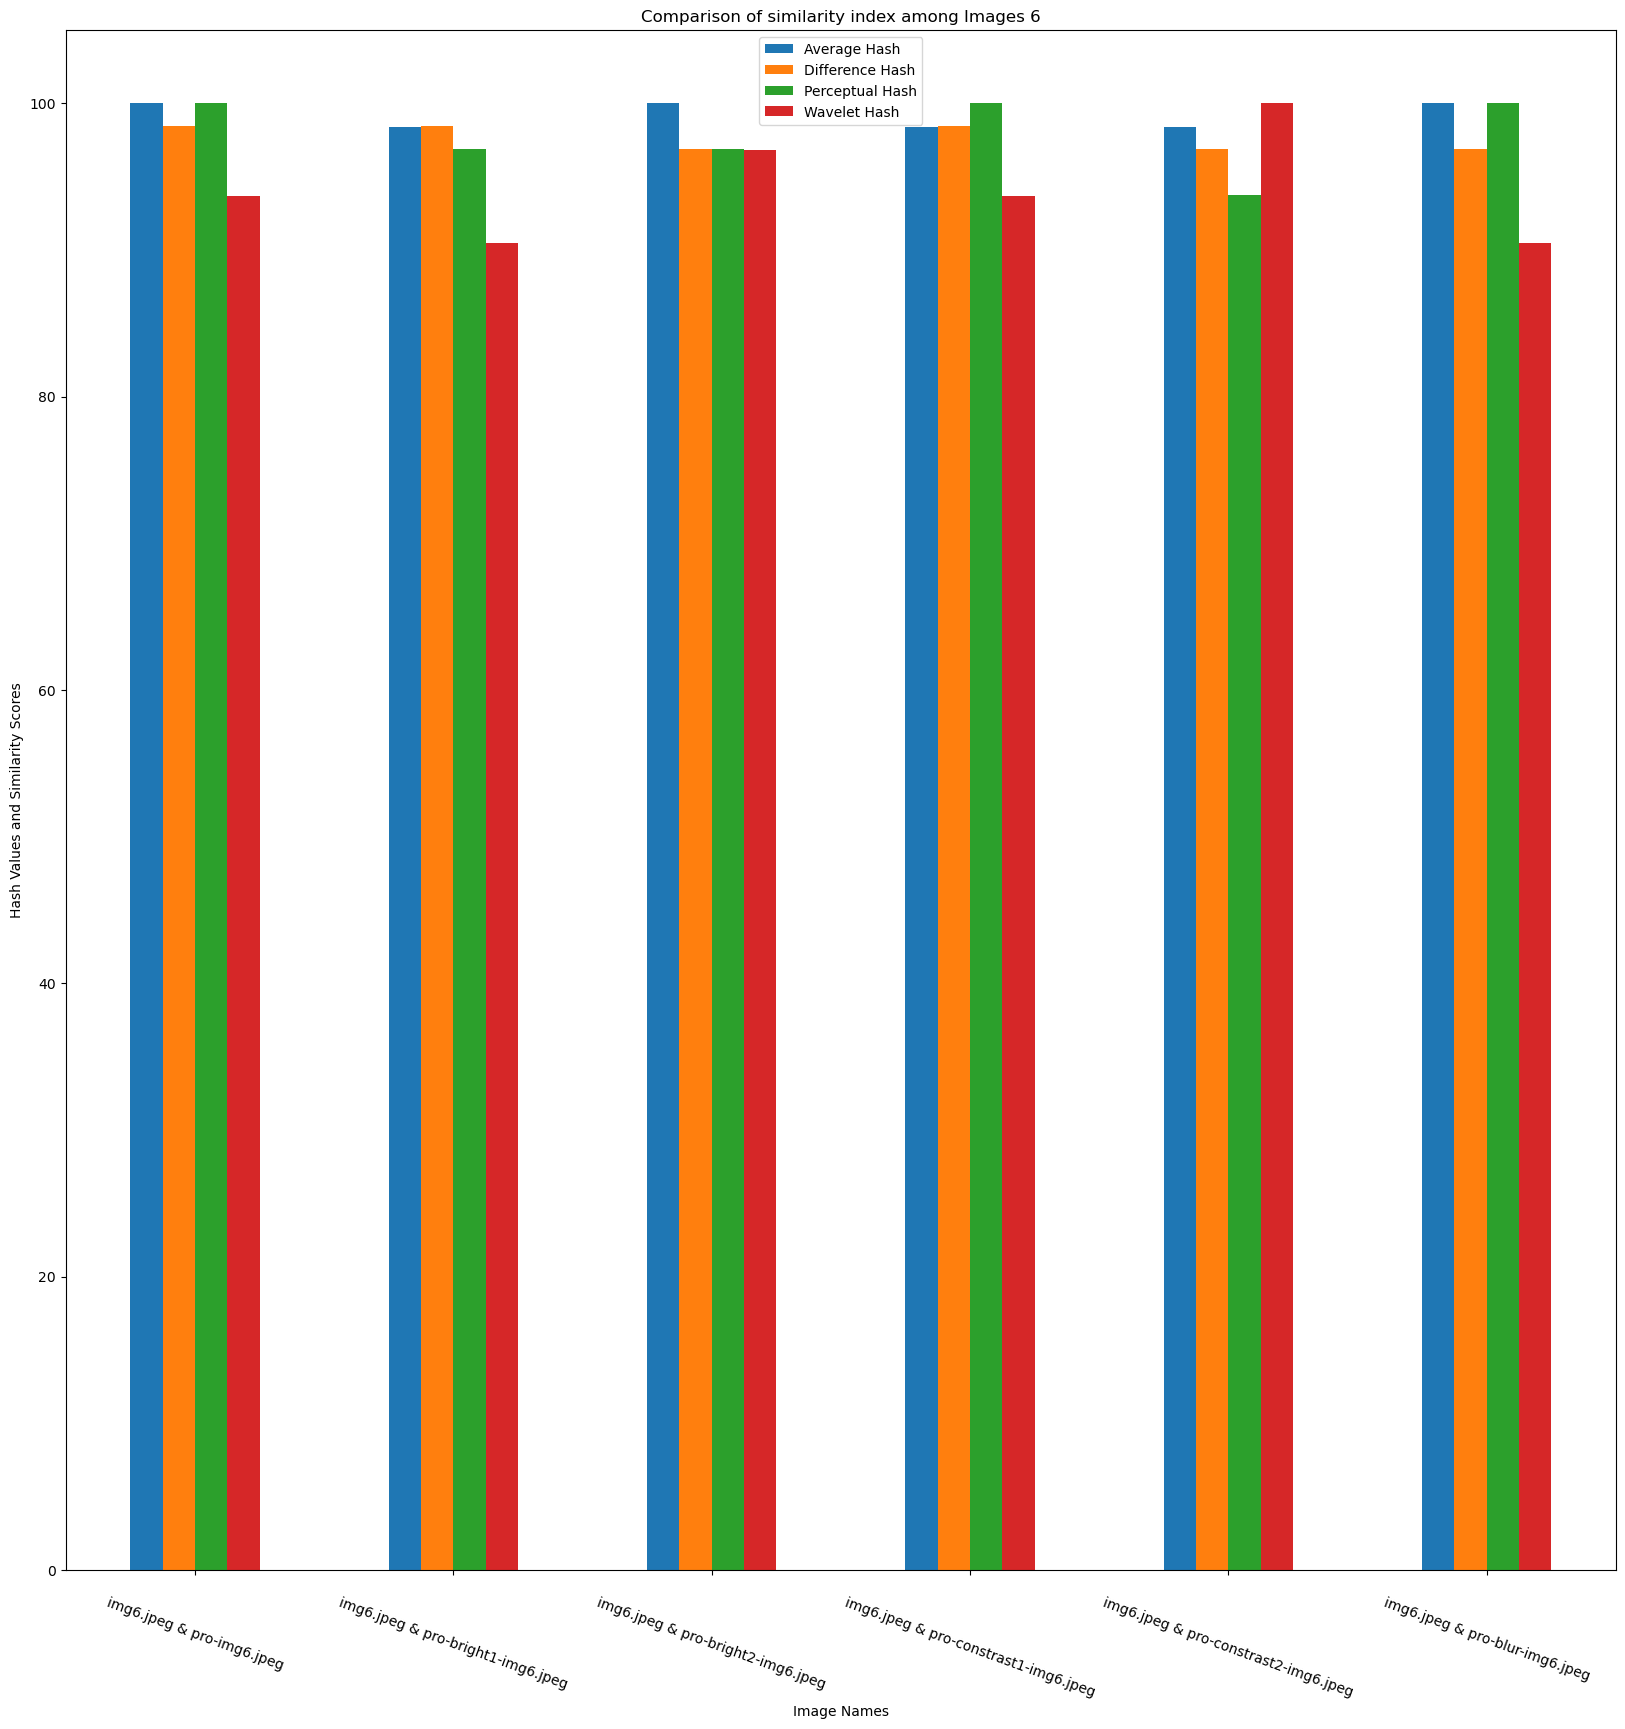

Comparison of similarity index among Images 7


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img7.jpg & pro-img7.jpg,98.44,95.31,90.62,93.75
img7.jpg & pro-bright1-img7.jpg,98.44,95.31,90.62,93.75
img7.jpg & pro-bright2-img7.jpg,98.44,95.31,93.75,87.50
img7.jpg & pro-constrast1-img7.jpg,98.44,95.31,90.62,93.75
img7.jpg & pro-constrast2-img7.jpg,98.44,93.75,93.75,81.25
img7.jpg & pro-blur-img7.jpg,98.44,95.31,90.62,93.75


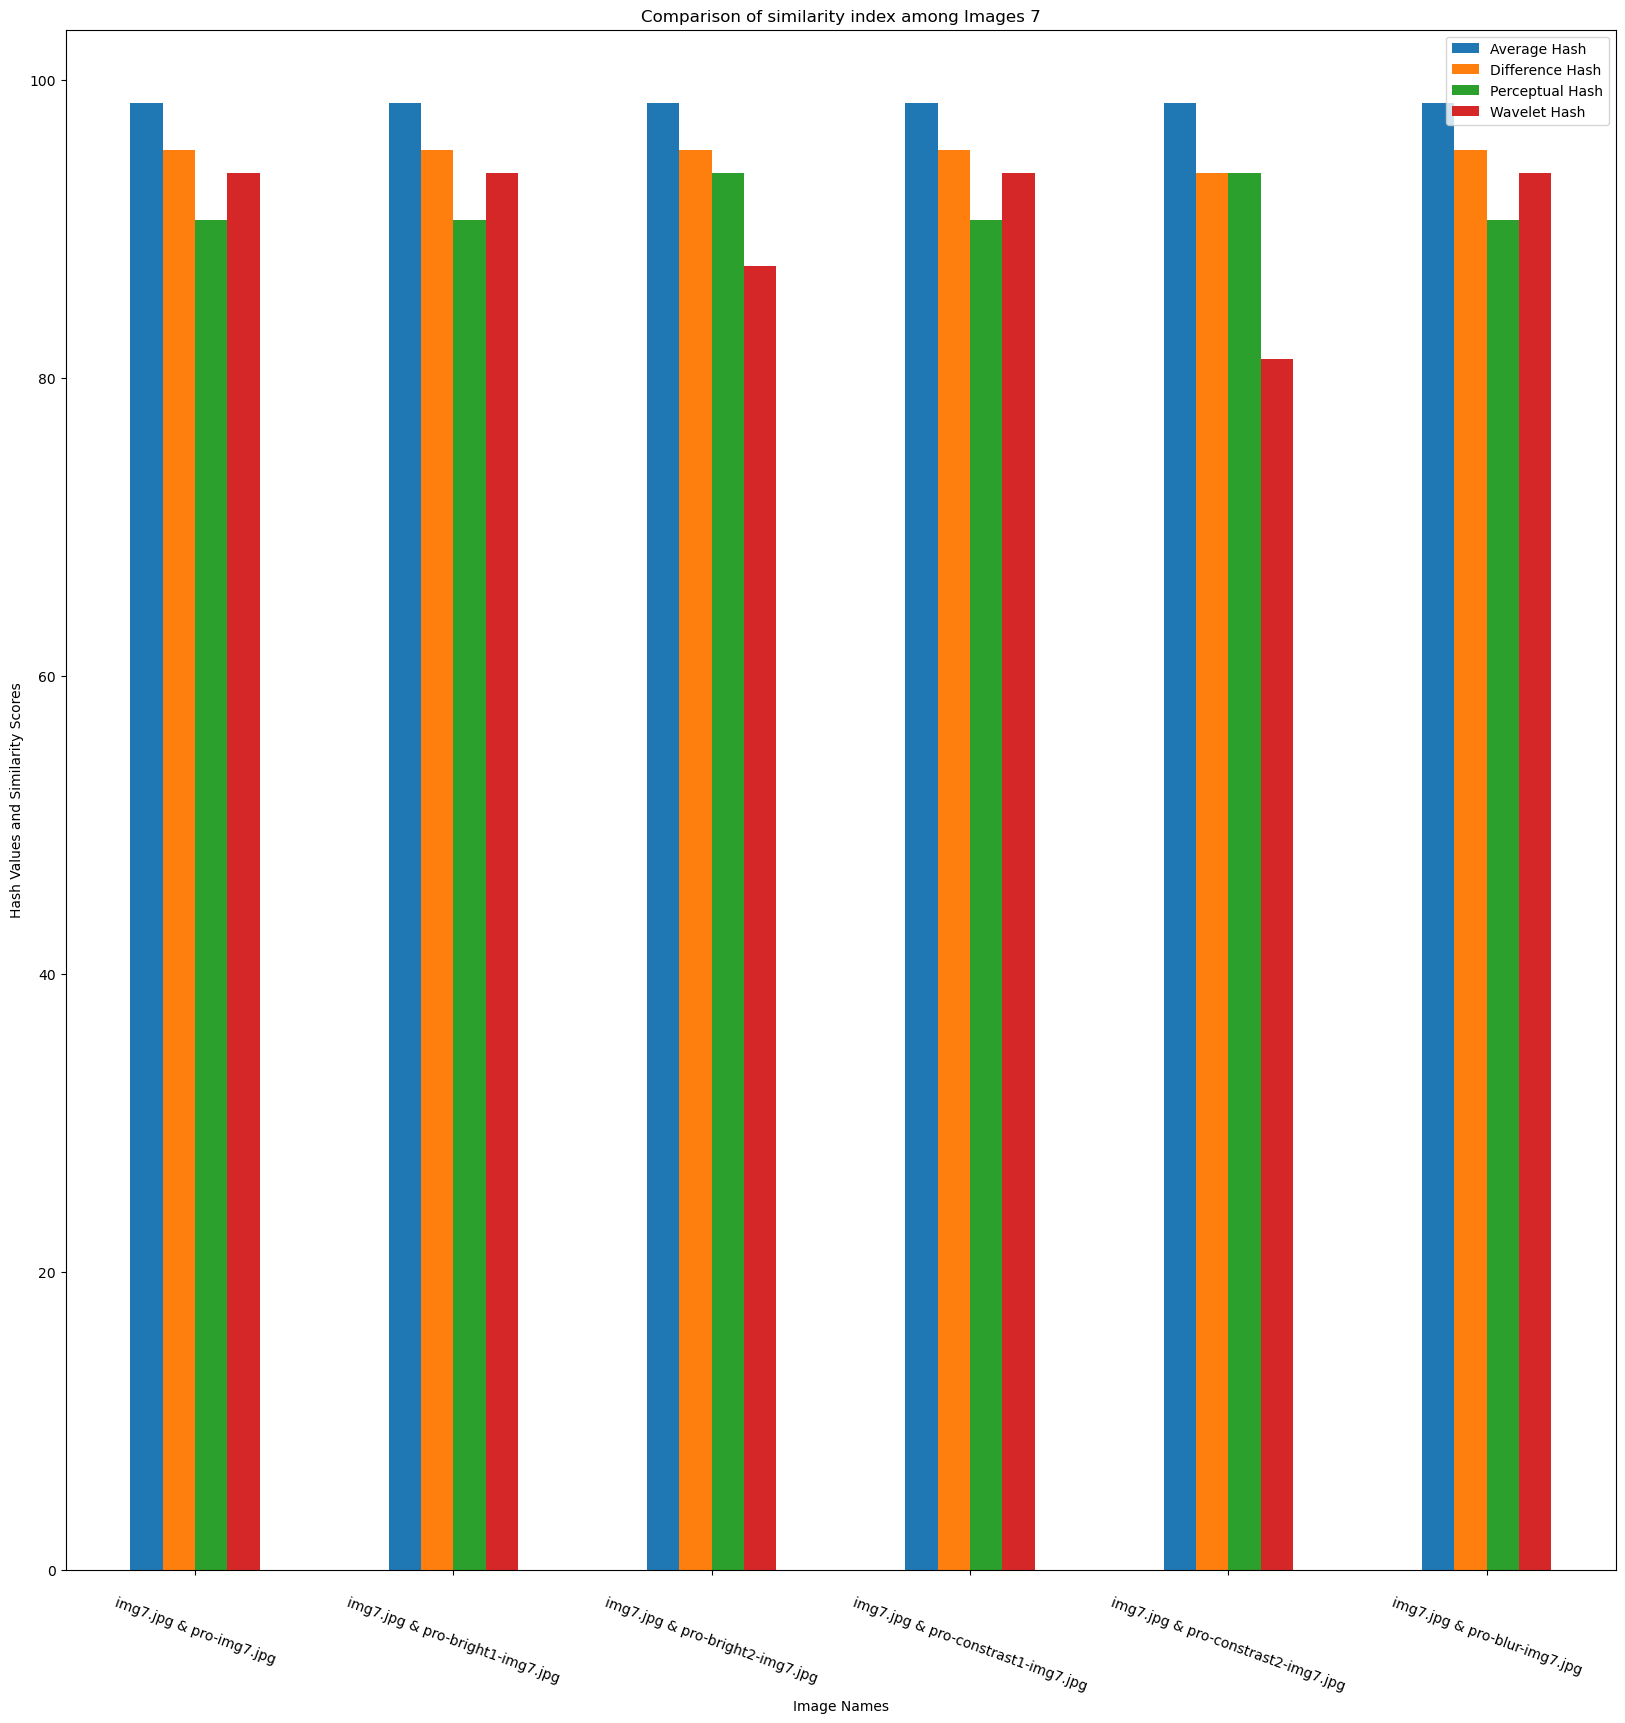

Comparison of similarity index among Images 8


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img8.jpg & pro-img8.jpg,98.44,100.00,96.88,100.0
img8.jpg & pro-bright1-img8.jpg,100.00,98.44,96.88,100.0
img8.jpg & pro-bright2-img8.jpg,96.88,95.31,93.75,100.0
img8.jpg & pro-constrast1-img8.jpg,98.44,100.00,96.88,100.0
img8.jpg & pro-constrast2-img8.jpg,95.31,93.75,90.62,100.0
img8.jpg & pro-blur-img8.jpg,98.44,100.00,96.88,100.0


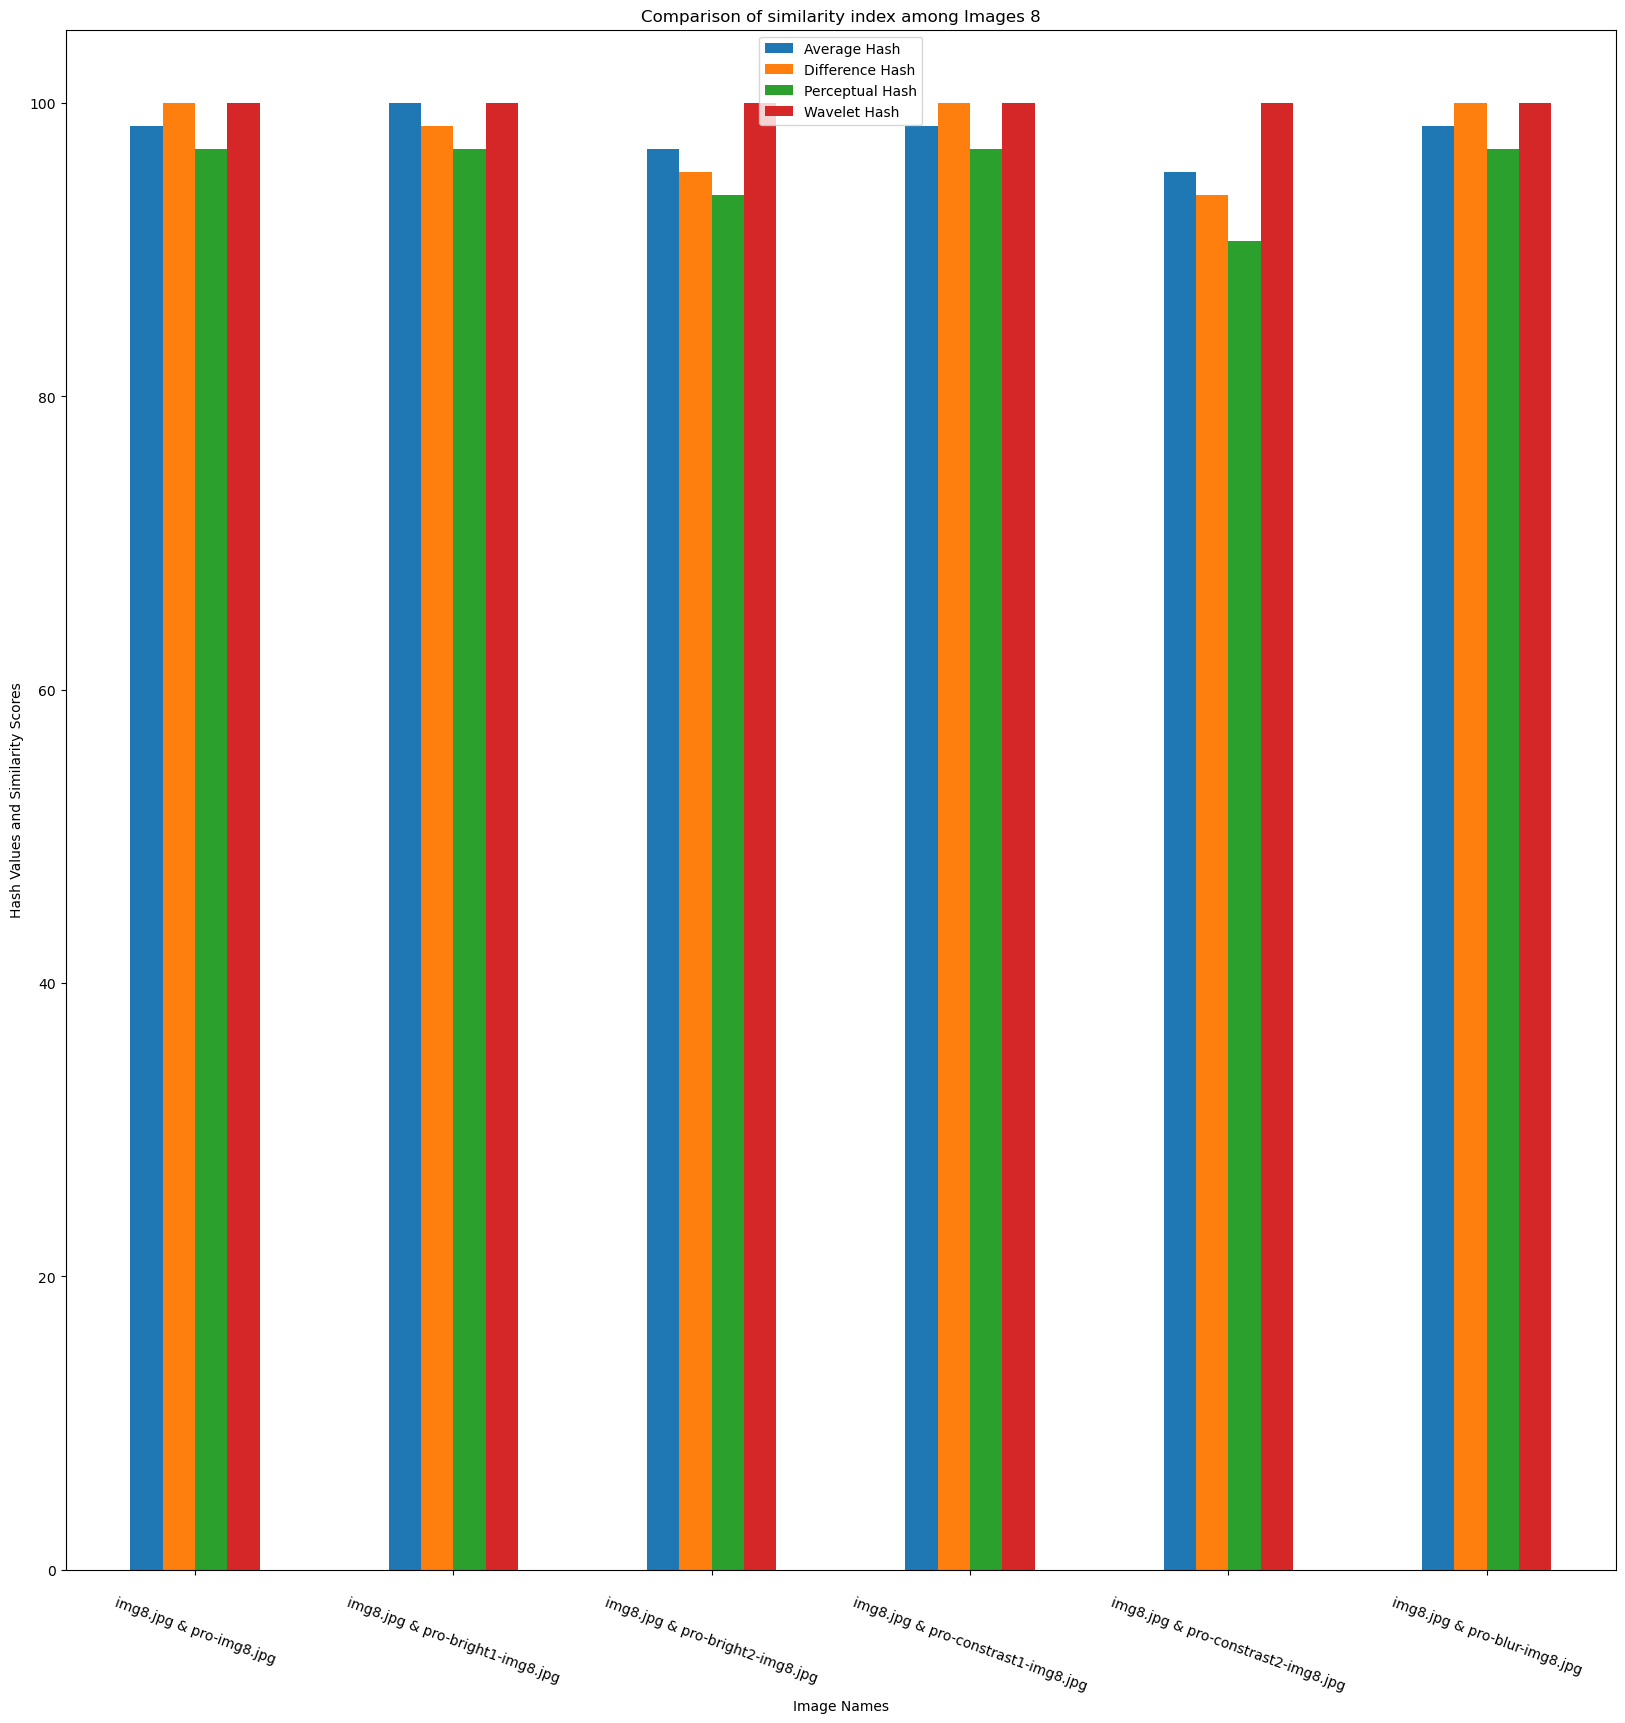

Comparison of similarity index among Images 9


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img9.jpeg & pro-img9.jpeg,95.31,95.16,96.88,100.00
img9.jpeg & pro-bright1-img9.jpeg,98.44,95.16,96.88,96.88
img9.jpeg & pro-bright2-img9.jpeg,82.81,95.16,90.62,96.88
img9.jpeg & pro-constrast1-img9.jpeg,95.31,96.77,96.88,100.00
img9.jpeg & pro-constrast2-img9.jpeg,76.56,91.94,87.50,96.88
img9.jpeg & pro-blur-img9.jpeg,95.31,95.16,96.88,96.88


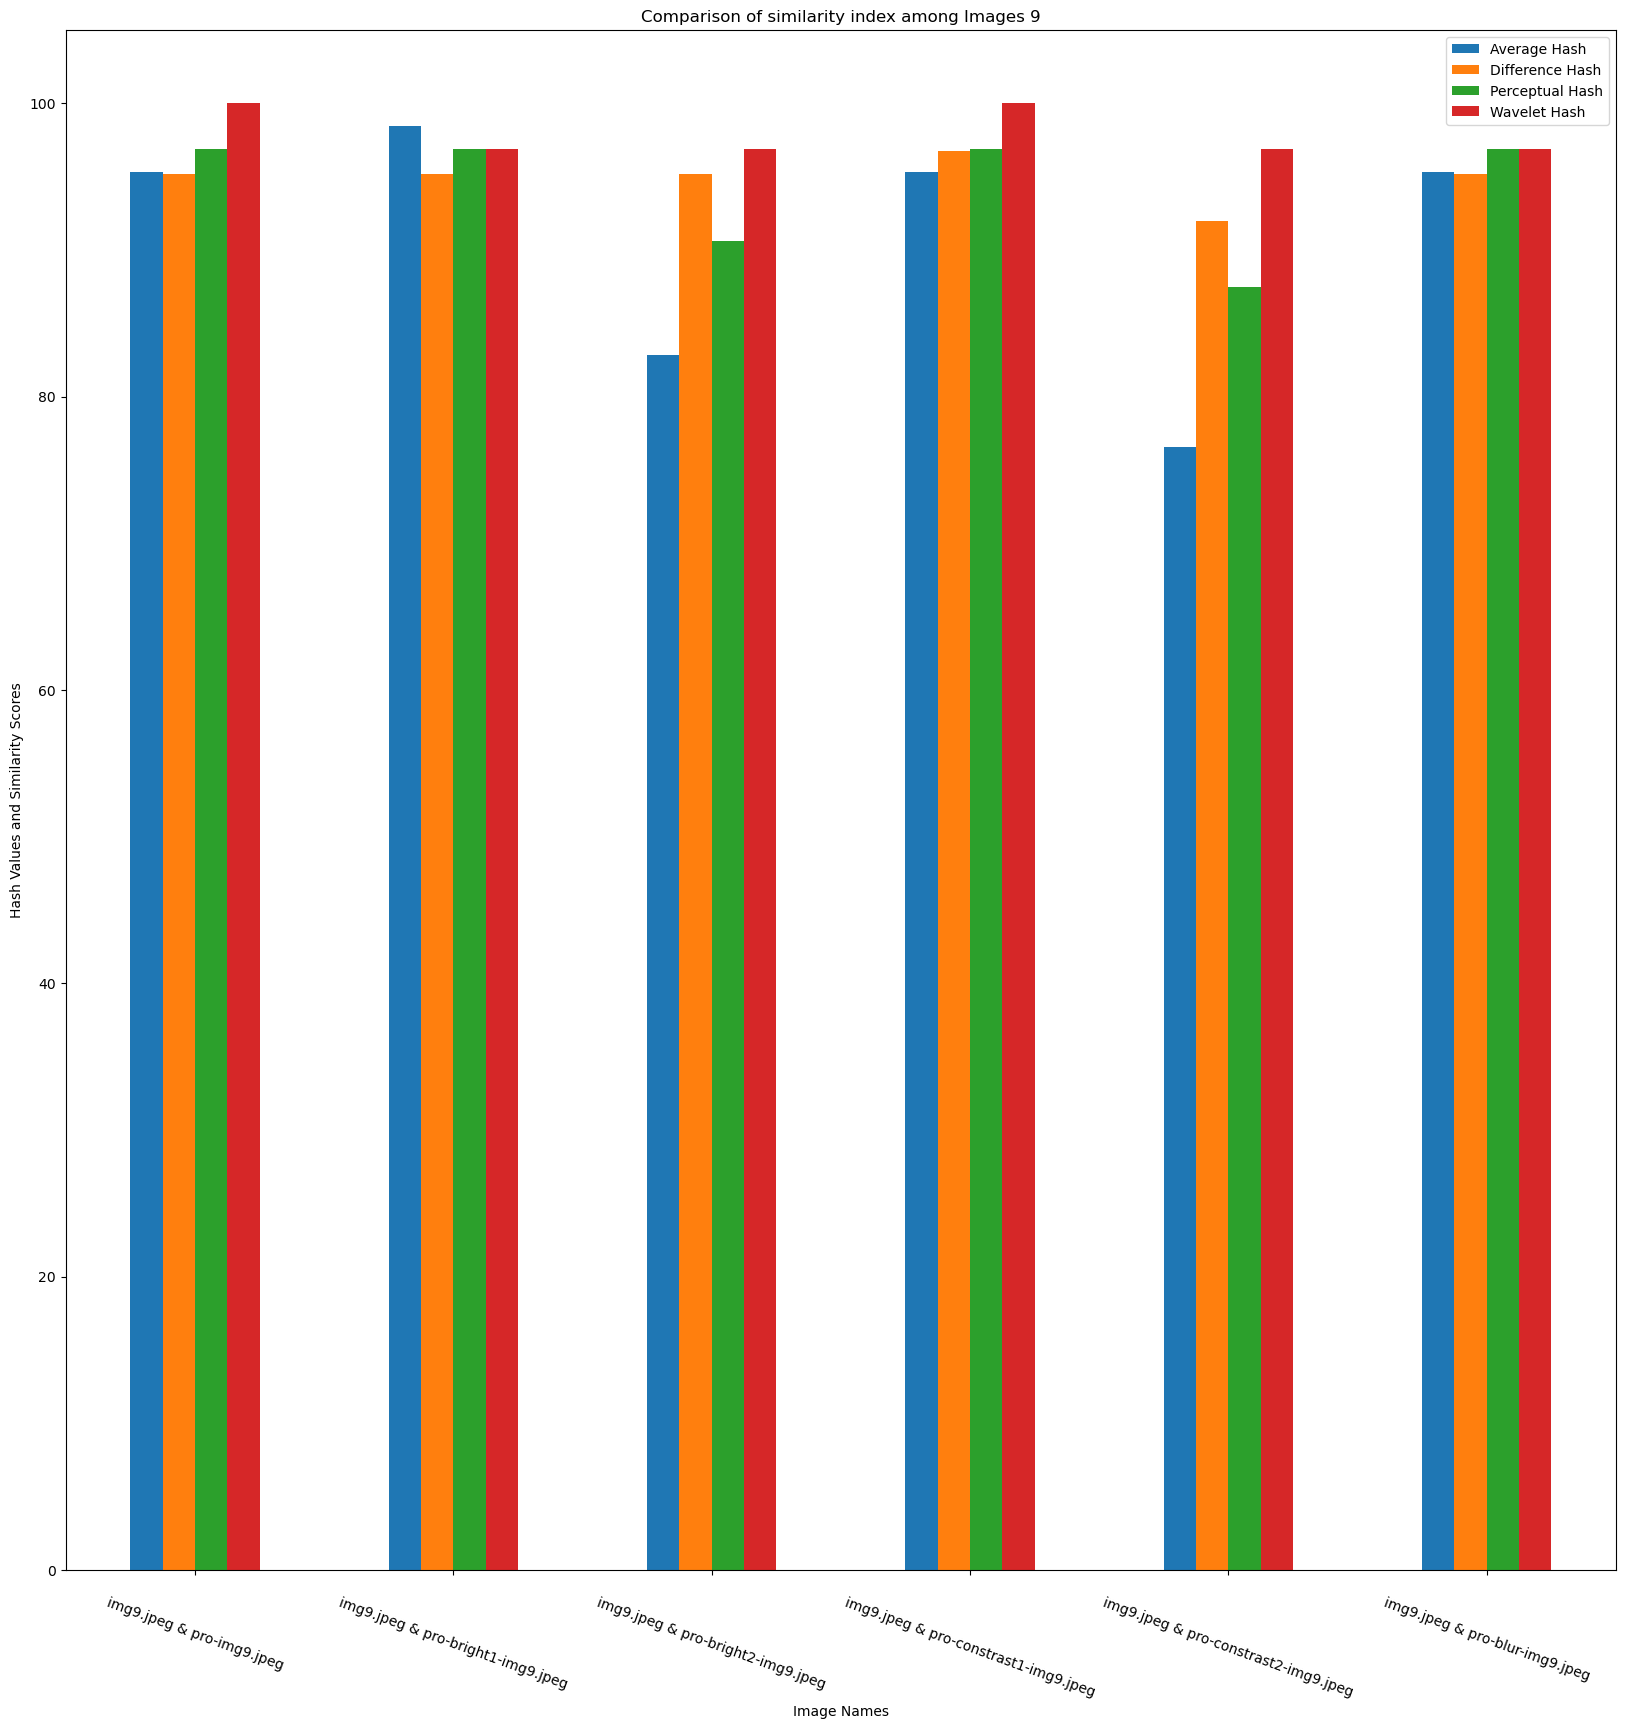

Comparison of similarity index among Images 10


,Average Hash,Difference Hash,Perceptual Hash,Wavelet Hash
img10.jpeg & pro-img10.jpeg,98.44,98.41,100.00,96.88
img10.jpeg & pro-bright1-img10.jpeg,98.44,95.24,100.00,96.88
img10.jpeg & pro-bright2-img10.jpeg,95.31,85.71,93.75,93.75
img10.jpeg & pro-constrast1-img10.jpeg,98.44,93.65,100.00,96.88
img10.jpeg & pro-constrast2-img10.jpeg,93.75,80.95,93.75,90.62
img10.jpeg & pro-blur-img10.jpeg,98.44,93.65,100.00,96.88


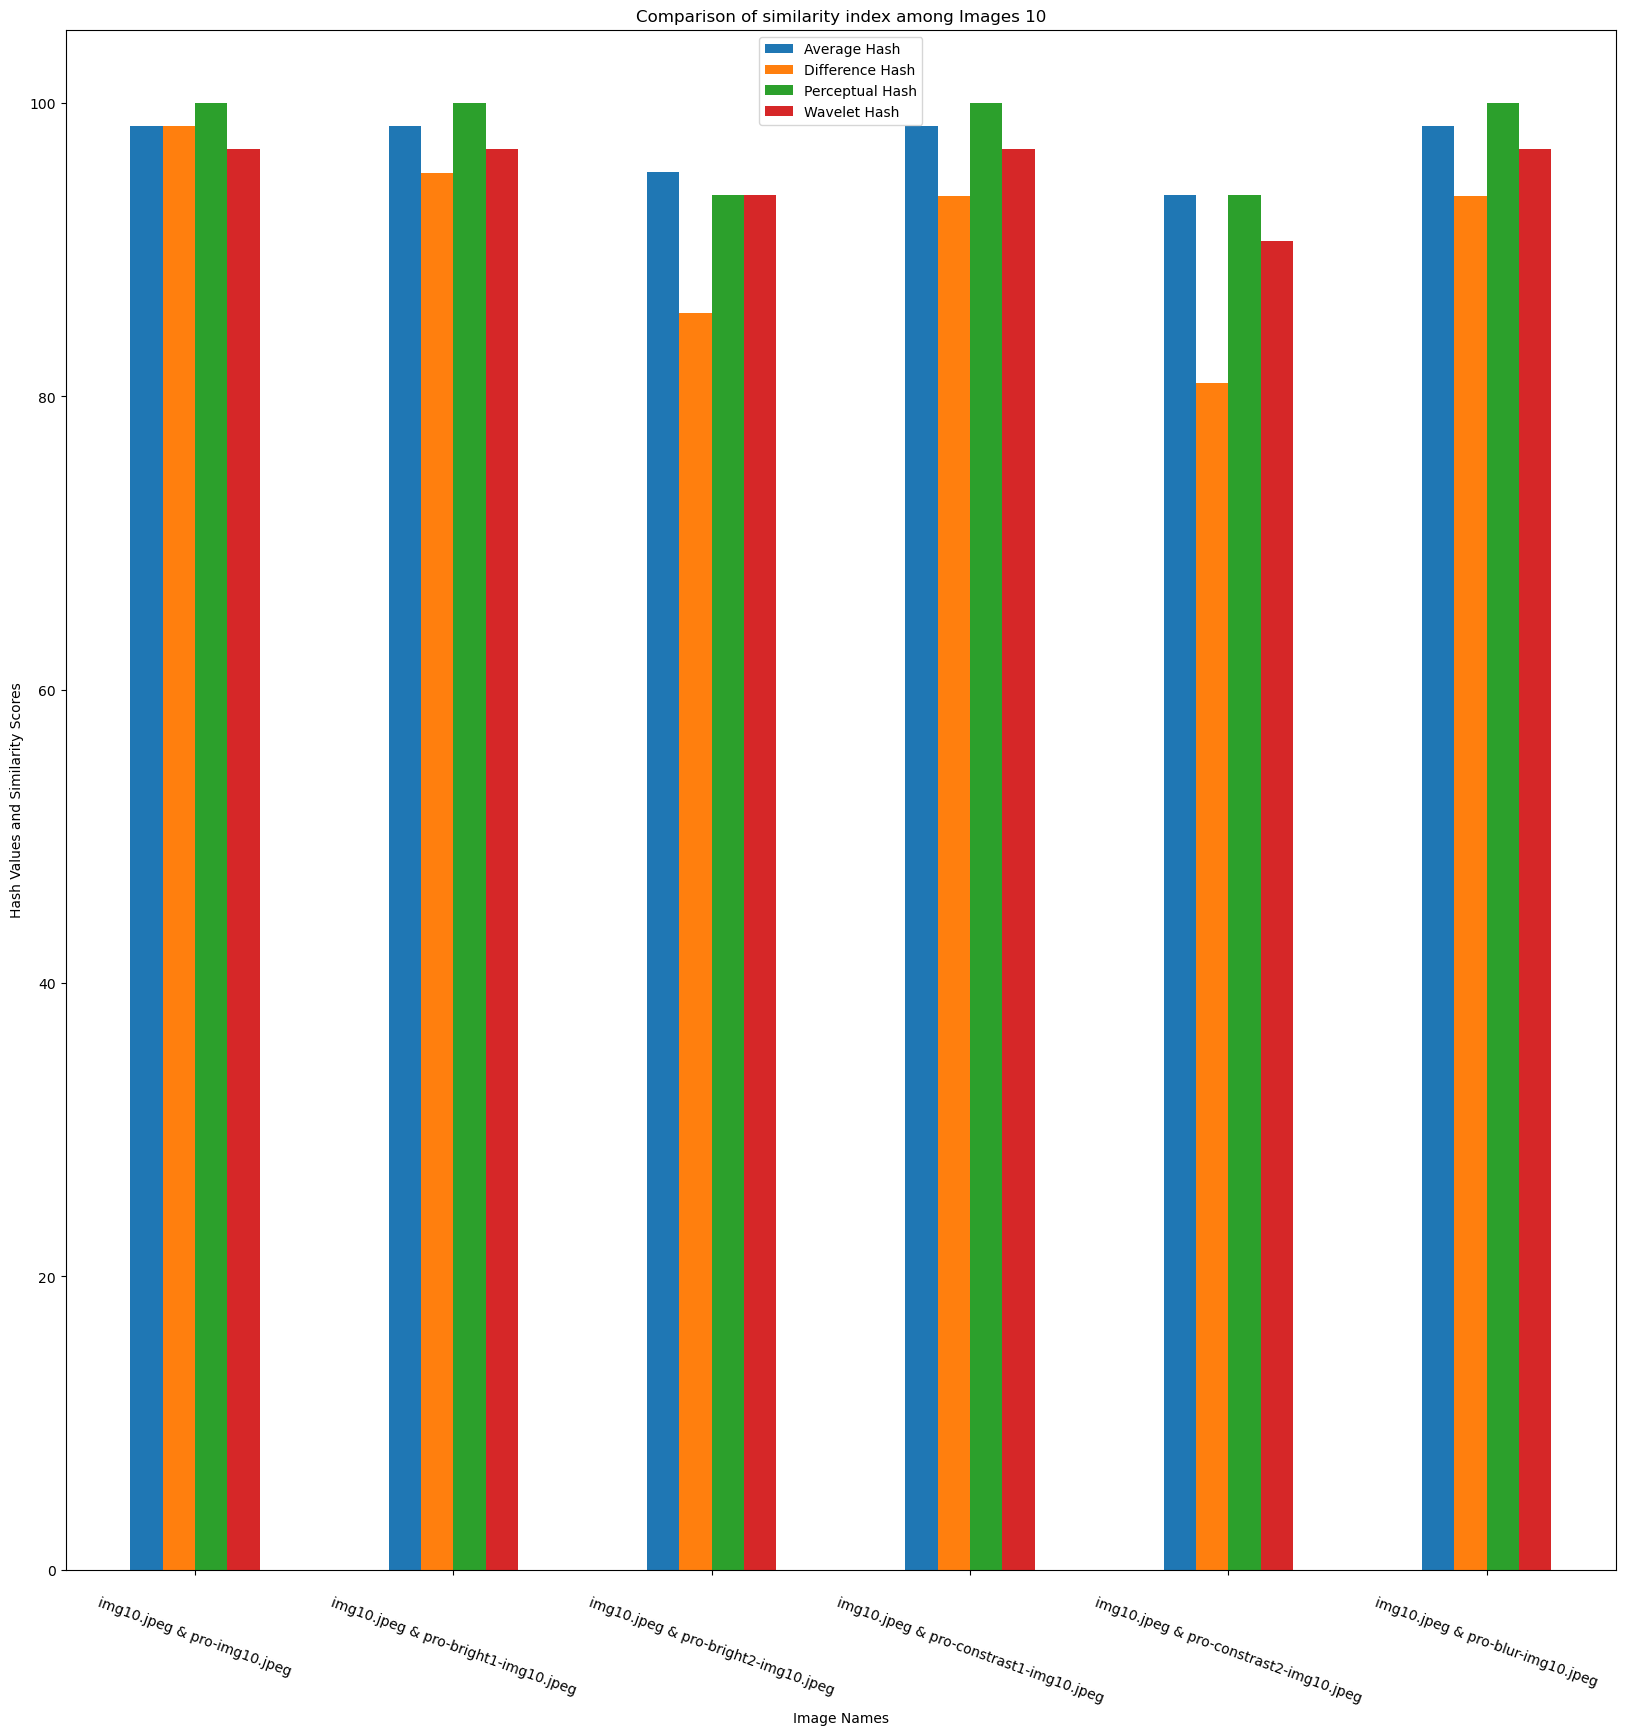

In [13]:
def sec_exp(gallery = askopenfilenames()):
    
    count = 1
    for i in gallery:
        #list of average hash
        ahashlst = list()
        #list of difference hash
        dhashlst = list()
        #list of perceptual hash
        phashlst = list()
        #list of wavelet hash
        whashlst = list()
        #list of image name
        namelst = list()
        #final result
        fin = dict()
        
        
        #adjusting original file
        aFile = adjust(tuple([i]))
        
        #preprocessing adjusted original file
        pFile = preprocessing(tuple(aFile))
        
        
        #getting the image used to compare against other
        pro_ori_img = preprocessing(tuple([i]))
        #list of images that to be compared
        pro_gallery = [pro_ori_img[0],]
        pro_gallery.extend(pFile)
    
        fileName = os.path.basename(i).split('/')[-1]
        
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using average hashing
        resulta = similarity(fileName,"average",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using difference hashing
        resultd = similarity(fileName,"difference",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using perceptual hashing
        resultp = similarity(fileName,"perceptual",pro_gallery)
        #compare the preprocessed original image with other images in preprocessed gallery 
        #by using wavelet hashing
        resultw = similarity(fileName,"wavelet",pro_gallery)
        
        for key,content in resulta.items():
            #appending average hash value
            ahashlst.append(content)
            #appending image name
            namelst.append(key)
        
        for key,content in resultd.items():
            #appending difference hash value
            dhashlst.append(content)
        
        for key,content in resultp.items():
            #appending perceptual hash value
            phashlst.append(content)
            
        for key,content in resultw.items():
            #appending wavelet hash value
            whashlst.append(content)
        
        key = ["Average Hash","Difference Hash","Perceptual Hash","Wavelet Hash"]
        for j in range(len(ahashlst)):
            fin[namelst[j]] = list([ahashlst[j],dhashlst[j],phashlst[j],whashlst[j]])

        #creating a pandas dataframe
        df = pandas.DataFrame(fin,index=key)
        table = df.T
        
        #creating a bar chart
        ax = table.plot(kind='bar', figsize=(20, 20))
        ax.set_title("Comparison of similarity index among Images "+str(count))
        ax.set_xlabel('Image Names')
        ax.set_ylabel('Hash Values and Similarity Scores')
        ax.tick_params(axis='x', labelrotation=340,pad=15)
        
        print("Comparison of similarity index among Images "+str(count))
        #display table
        display(table)
        #show chart
        plt.show(ax)
        count = count + 1
        
#     plt.savefig(location+'chart2.png')
#     return table,ax
sec_exp()